In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("train_data.csv")
data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,no_of_image,is_personalised,no_of_quotes,is_timer,no_of_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [3]:
data.shape

(1888, 22)

### Variable - Description

campaign_id - Unique identifier of a campaign

sender - Sender of an e-mail

subject_len - No. of characters in a subject

body_len - No. of characters in an email body

mean_paragraph_len - Average no. of characters in paragraph of an email

day_of_week - Day on which email is sent

is_weekend - Boolean flag indicating if an email is sent on weekend or not

times_of_day - Times of day when email is sent: Morning, Noon, Evening

category - Category of the product an email is related to

product - Type of the product an email is related to

no_of_CTA - No. of Call To Actions in an email

mean_CTA_len - Average no. of characters in a CTA

no_of_image - No. of images in an email

is_personalised - Boolean flag indicating if an email is personalized to the user or not

no_of_quotes - No. of quotes in an email

is_timer - Boolean flag indicating if an email contains a timer or not

no_of_emoticons - No. of emoticons in an email

is_discount - Boolean flag indicating if an email contains a discount or not

is_price - Boolean flag indicating if an email contains price or not

is_urgency - Boolean flag indicating if an email contains urgency or not

target_audience - Cluster label of the target audience

click_rate (Target Variable) - Click rate of an email campaign

In [4]:
data.click_rate.describe()

count    1888.000000
mean        0.041888
std         0.084223
min         0.000000
25%         0.005413
50%         0.010686
75%         0.035589
max         0.897959
Name: click_rate, dtype: float64

In [5]:
data.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'no_of_image',
       'is_personalised', 'no_of_quotes', 'is_timer', 'no_of_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [6]:
data.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,no_of_image,is_personalised,no_of_quotes,is_timer,no_of_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  no_of_image         1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  no_of_quotes        1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  no_of_

In [8]:
data.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
no_of_image           0
is_personalised       0
no_of_quotes          0
is_timer              0
no_of_emoticons       0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [9]:
data.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'no_of_image',
       'is_personalised', 'no_of_quotes', 'is_timer', 'no_of_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

### DATA EXPLORATION AND ANALYSIS

In [10]:
def plot_hist(data):
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        data[column].hist(bins=50)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.savefig(f"images/histogram_{column}.jpg")
        plt.close()

# Example usage:
# Assuming 'data' is a DataFrame with columns for which histograms need to be plotted
plot_hist(data)


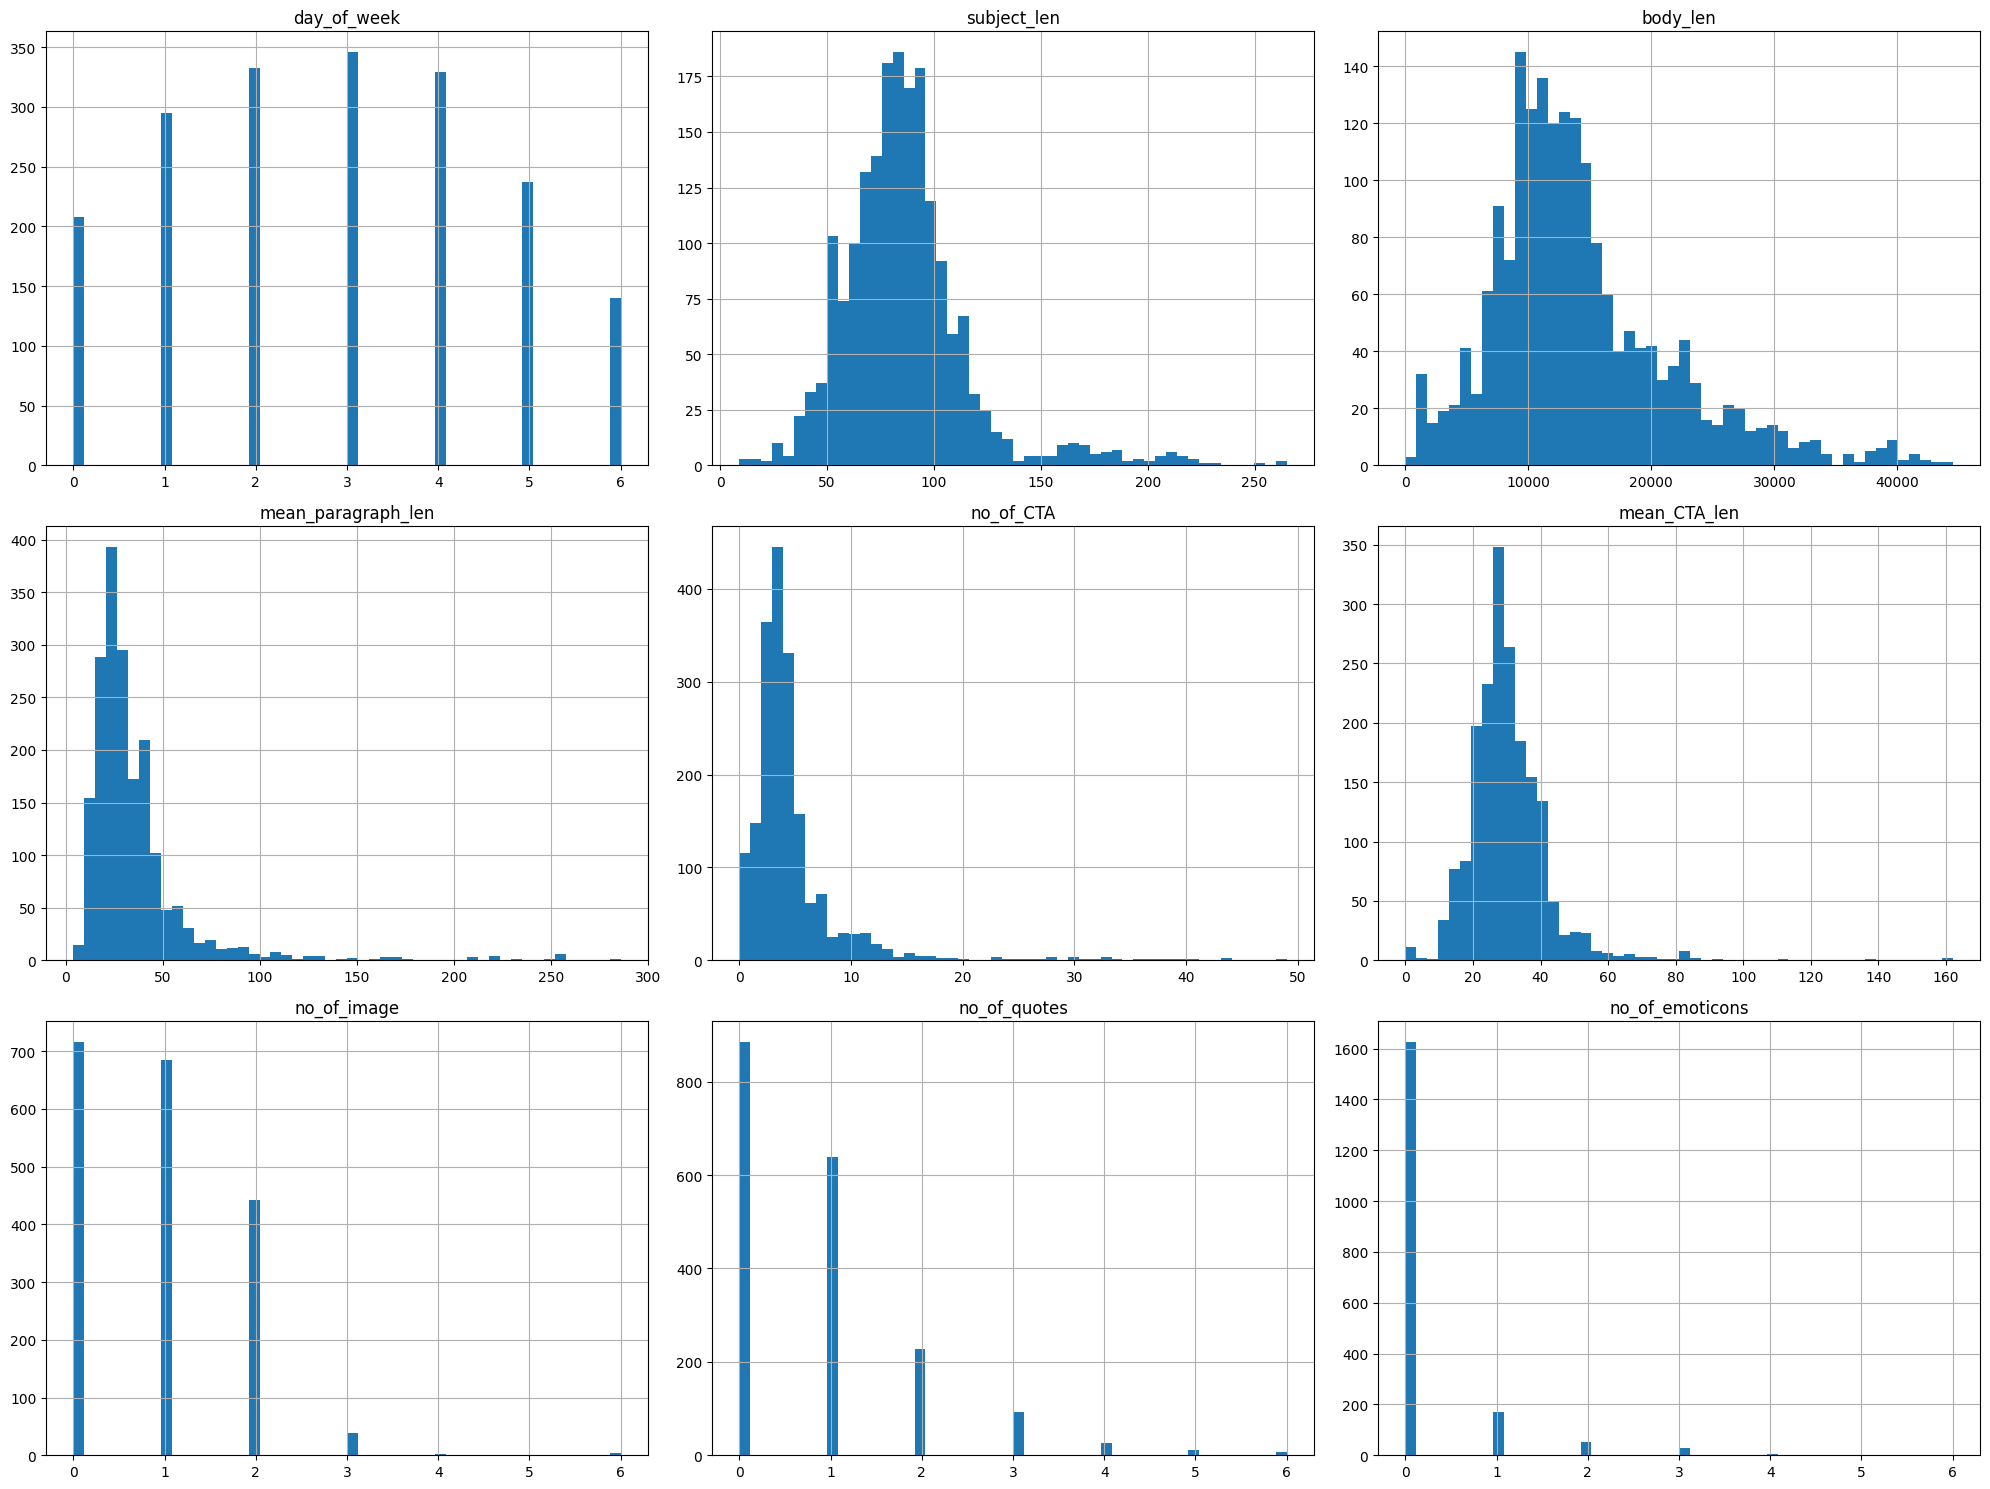

In [11]:
plot_hist(data[['day_of_week','subject_len', 'body_len', 'mean_paragraph_len','no_of_CTA', 'mean_CTA_len', 'no_of_image',  'no_of_quotes','no_of_emoticons']])

#### PLOT DATA AFTER SCALING

In [13]:
# Define the numerical attributes
numerical_feature = ['day_of_week','subject_len', 'body_len', 'mean_paragraph_len','no_of_CTA', 'mean_CTA_len', 'no_of_image',  'no_of_quotes','no_of_emoticons']

# Define the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical attributes
X_train_scaled = scaler.fit_transform(data[numerical_feature])

def plot_scaled_distribution(X_scaled, feature_names):
    num_features = X_scaled.shape[1]
    for i in range(num_features):
        plt.figure(figsize=(10, 6))
        plt.hist(X_scaled[:, i], bins=50, alpha=0.7)
        plt.title(f'Distribution of {feature_names[i]} (Scaled)')
        plt.xlabel('Scaled Value')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.savefig(f"images/scaled_distribution_{feature_names[i]}.jpg")
        plt.close()

# Example usage:
# Assuming 'X_train_scaled' is the scaled numerical features and 'numerical_feature' is the list of feature names
plot_scaled_distribution(X_train_scaled, numerical_feature)

In [ ]:
plot_hist(pd.DataFrame(X_train_scaled, columns=numerical_feature))

In [15]:
##### correlation with target variable
data_num = data.drop(columns=['times_of_day'], errors='ignore')

# Calculate the correlation matrix
corr_matrix = data_num.corr()

corr_matrix["click_rate"].sort_values(ascending = False)

click_rate            1.000000
mean_paragraph_len    0.178042
product               0.121602
is_weekend            0.114138
day_of_week           0.086372
campaign_id           0.053315
target_audience       0.038713
is_personalised       0.032922
no_of_image          -0.021527
is_price             -0.030540
mean_CTA_len         -0.031162
sender               -0.031398
is_discount          -0.086105
no_of_emoticons      -0.094305
no_of_quotes         -0.098402
is_urgency           -0.114284
category             -0.167756
no_of_CTA            -0.172637
subject_len          -0.180143
body_len             -0.247866
is_timer                   NaN
Name: click_rate, dtype: float64

In [16]:
## Attribute combination
data_num['total_visual_content'] = data_num['no_of_image'] + data['no_of_quotes']
data_num['paragraph_body_ratio'] = data_num['mean_paragraph_len'] / data['body_len']


In [17]:
##### correlation with target variable
corr_matrix = data_num.corr()
corr_matrix["click_rate"].sort_values(ascending = False)

click_rate              1.000000
paragraph_body_ratio    0.227258
mean_paragraph_len      0.178042
product                 0.121602
is_weekend              0.114138
day_of_week             0.086372
campaign_id             0.053315
target_audience         0.038713
is_personalised         0.032922
no_of_image            -0.021527
is_price               -0.030540
mean_CTA_len           -0.031162
sender                 -0.031398
is_discount            -0.086105
total_visual_content   -0.092284
no_of_emoticons        -0.094305
no_of_quotes           -0.098402
is_urgency             -0.114284
category               -0.167756
no_of_CTA              -0.172637
subject_len            -0.180143
body_len               -0.247866
is_timer                     NaN
Name: click_rate, dtype: float64

In [18]:
# Plot the correlation matrix heatmap and save it as an image
import seaborn as sns
def plot_corr_heatmap(corr_matrix):
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Reds')
    plt.title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.savefig("images/correlation_heatmap.jpg")
    plt.close()

# Example usage:
# Assuming 'corr_matrix' is the correlation matrix
plot_corr_heatmap(corr_matrix)


In [19]:
data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,no_of_image,is_personalised,no_of_quotes,is_timer,no_of_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [21]:
columns_to_check=['click_rate', 'no_of_CTA', 'mean_CTA_len' , 'subject_len', 'body_len', 'mean_paragraph_len']

array([[<Axes: xlabel='click_rate', ylabel='click_rate'>,
        <Axes: xlabel='no_of_CTA', ylabel='click_rate'>,
        <Axes: xlabel='mean_CTA_len', ylabel='click_rate'>,
        <Axes: xlabel='subject_len', ylabel='click_rate'>,
        <Axes: xlabel='body_len', ylabel='click_rate'>,
        <Axes: xlabel='mean_paragraph_len', ylabel='click_rate'>],
       [<Axes: xlabel='click_rate', ylabel='no_of_CTA'>,
        <Axes: xlabel='no_of_CTA', ylabel='no_of_CTA'>,
        <Axes: xlabel='mean_CTA_len', ylabel='no_of_CTA'>,
        <Axes: xlabel='subject_len', ylabel='no_of_CTA'>,
        <Axes: xlabel='body_len', ylabel='no_of_CTA'>,
        <Axes: xlabel='mean_paragraph_len', ylabel='no_of_CTA'>],
       [<Axes: xlabel='click_rate', ylabel='mean_CTA_len'>,
        <Axes: xlabel='no_of_CTA', ylabel='mean_CTA_len'>,
        <Axes: xlabel='mean_CTA_len', ylabel='mean_CTA_len'>,
        <Axes: xlabel='subject_len', ylabel='mean_CTA_len'>,
        <Axes: xlabel='body_len', ylabel='mean_CTA

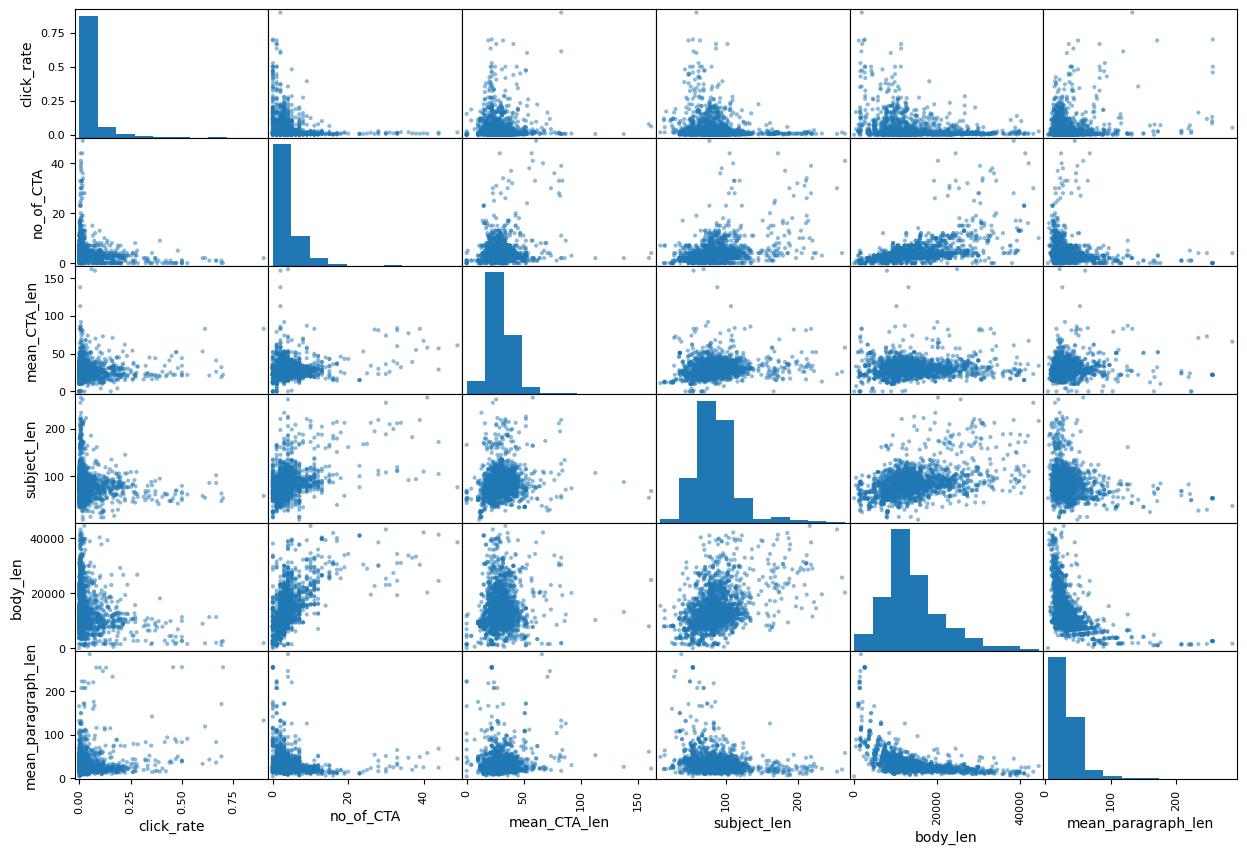

In [22]:
pd.plotting.scatter_matrix(data[columns_to_check], figsize=(15, 10))

In [21]:
data.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'no_of_image',
       'is_personalised', 'no_of_quotes', 'is_timer', 'no_of_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [22]:
data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,no_of_image,is_personalised,no_of_quotes,is_timer,no_of_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def numerical_univariate_analysis(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(data=df, x=col, fill=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()

def categorical_univariate_analysis(df, categorical_cols):
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col)
        plt.title(f'Count of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
# def categorical_univariate_analysis(df, categorical_cols):
#     for col in categorical_cols:
#         plt.figure(figsize=(8, 4))
#         sns.countplot(data=df, x=col)
#         plt.title(f'Count of {col}')
#         plt.xlabel(col)
#         plt.ylabel('Count')
#         plt.xticks(rotation=45)
#         plt.tight_layout()
#         plt.savefig(f"images/{col}_countplot.jpg")
#         plt.close()

# Example usage:
# Assuming 'df' is your DataFrame and 'categorical_cols' is a list of categorical columns
# categorical_univariate_analysis(df, categorical_cols)



In [25]:
numerical_cols=['subject_len', 'body_len', 'mean_paragraph_len','no_of_CTA', 'mean_CTA_len']
categorical_cols=['no_of_image',  'no_of_quotes','no_of_emoticons', 'sender', 'category', 'product','target_audience', 'times_of_day', 'is_discount', 'is_price', 'is_urgency', 'is_personalised',  'is_weekend']

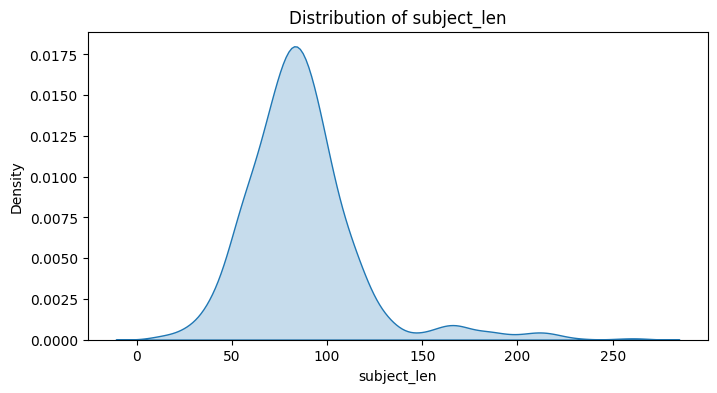

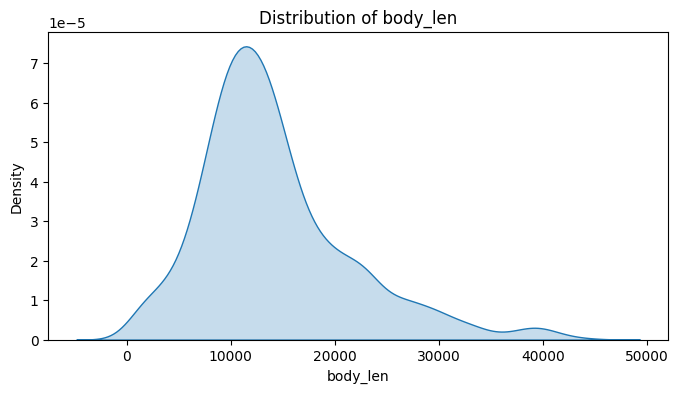

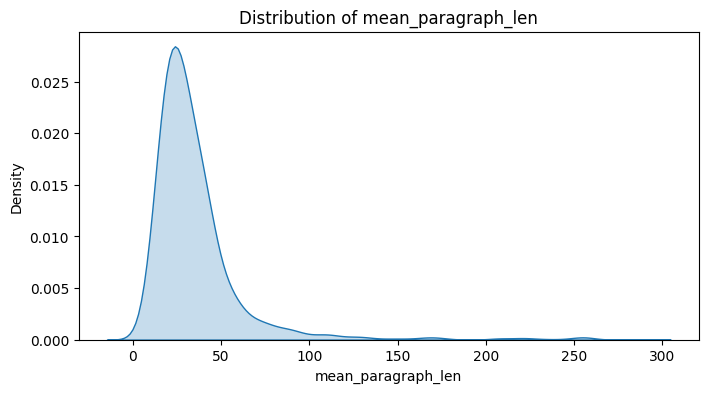

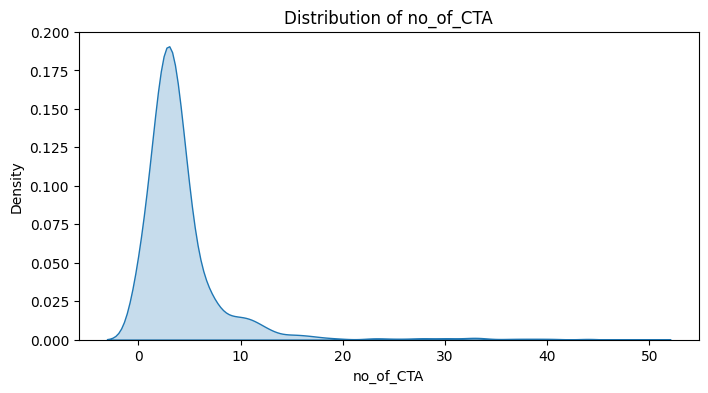

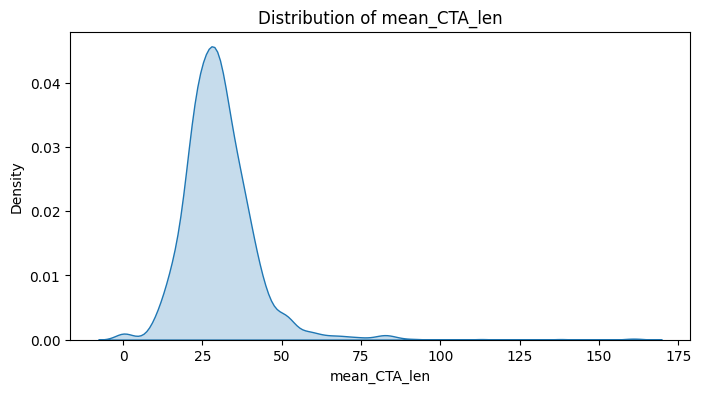

In [25]:
numerical_univariate_analysis(data, numerical_cols)

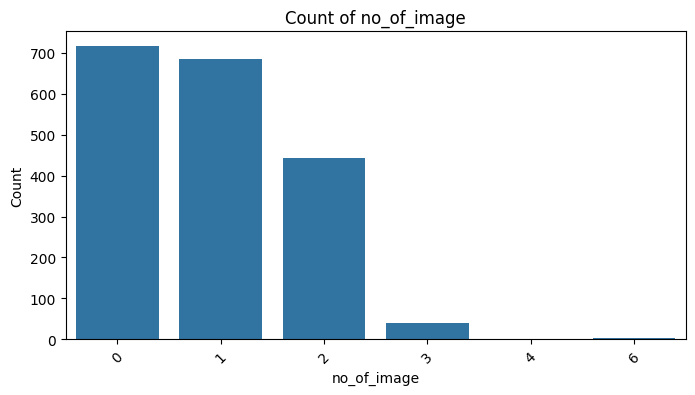

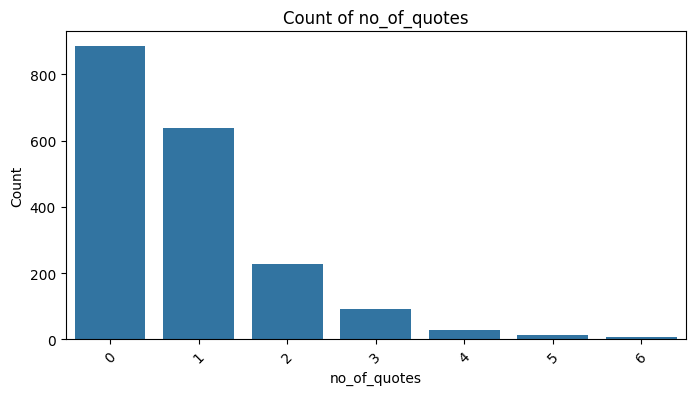

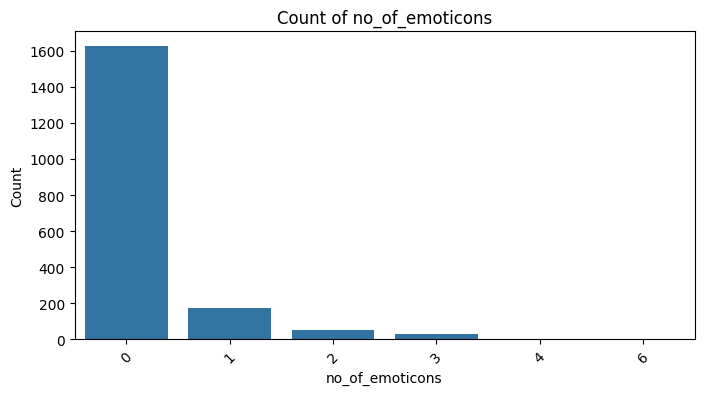

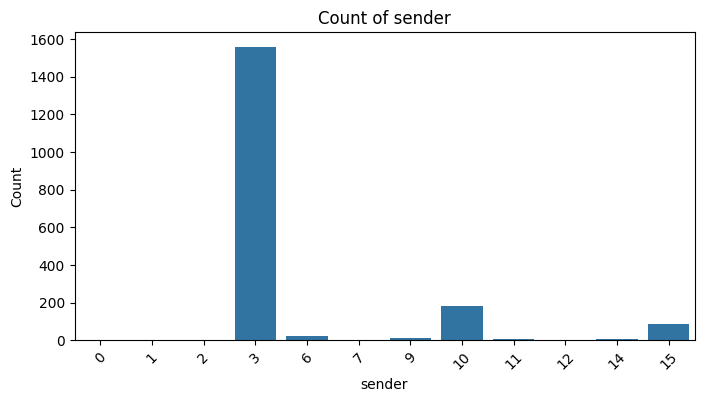

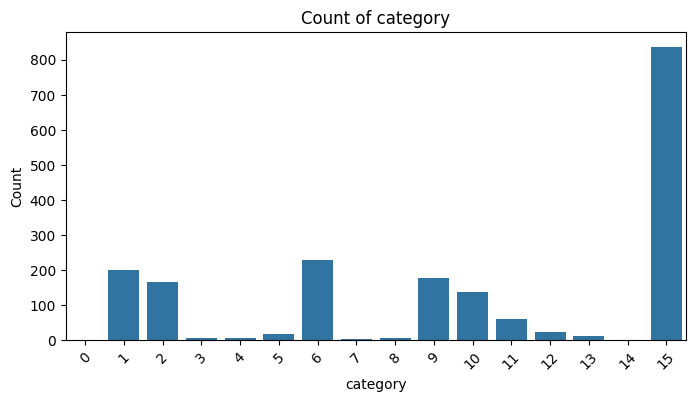

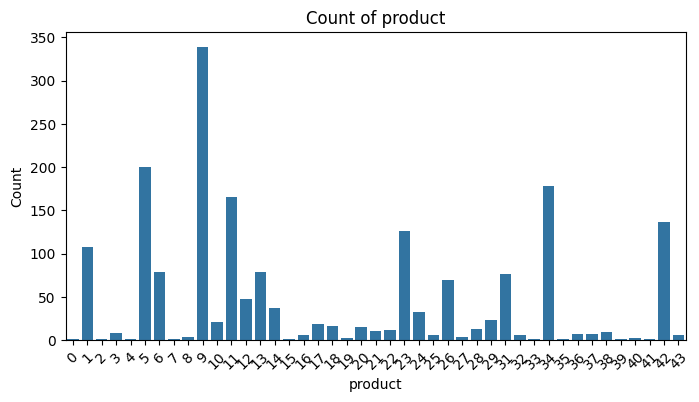

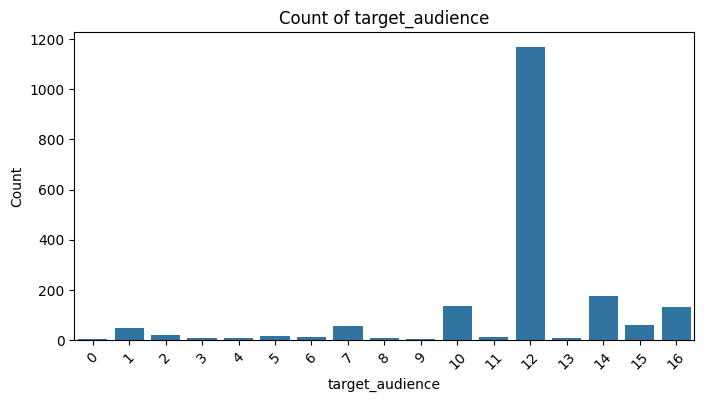

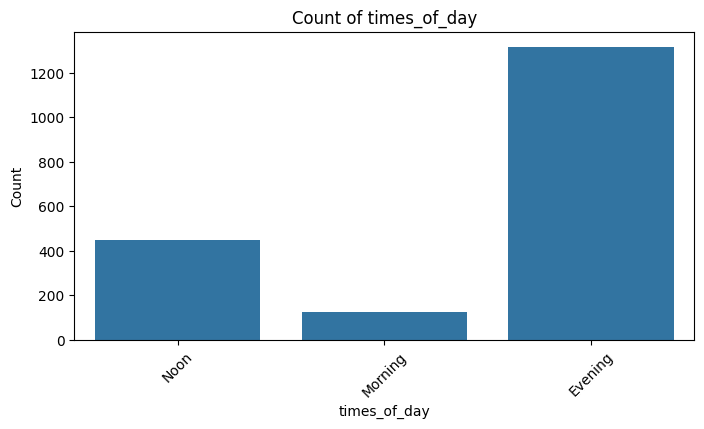

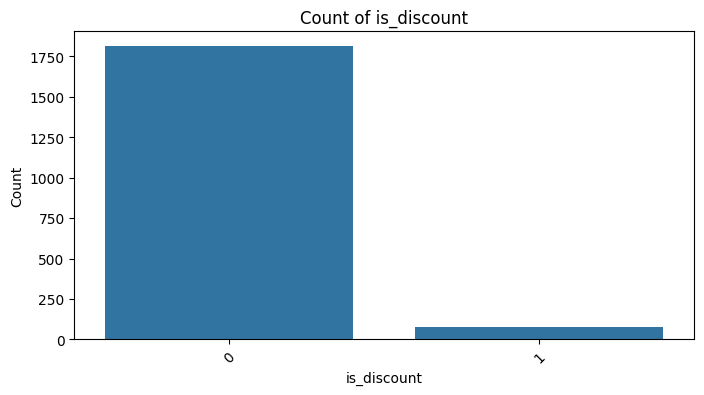

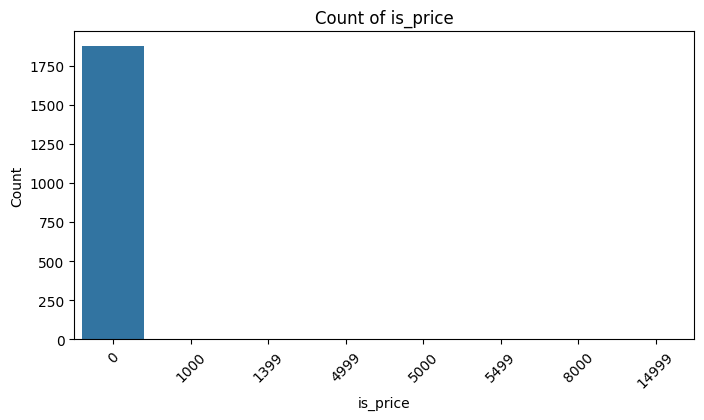

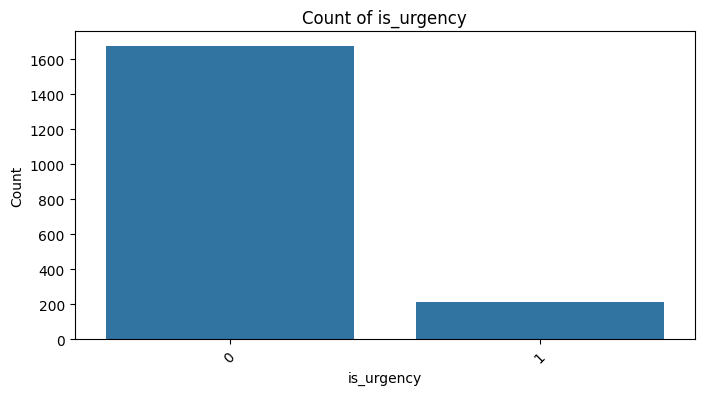

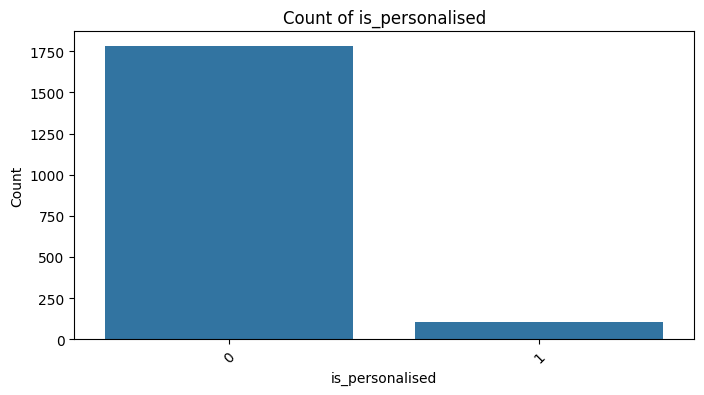

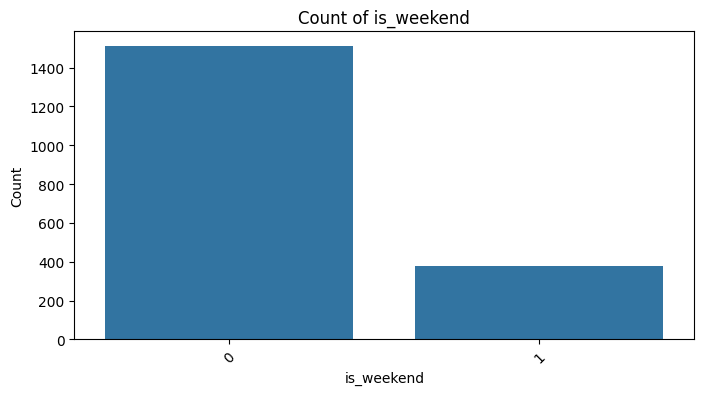

In [34]:
categorical_univariate_analysis(data, categorical_cols)

In [29]:
import seaborn as sns

def plot_numerical_with_target(data, numerical_cols, target_col, image_path):
    # Combine numerical and target columns
    cols_to_plot = numerical_cols + [target_col]
    
    # Create pairplot
    pairplot = sns.pairplot(data[cols_to_plot])
    pairplot.savefig(image_path)
    plt.show()
    plt.close()





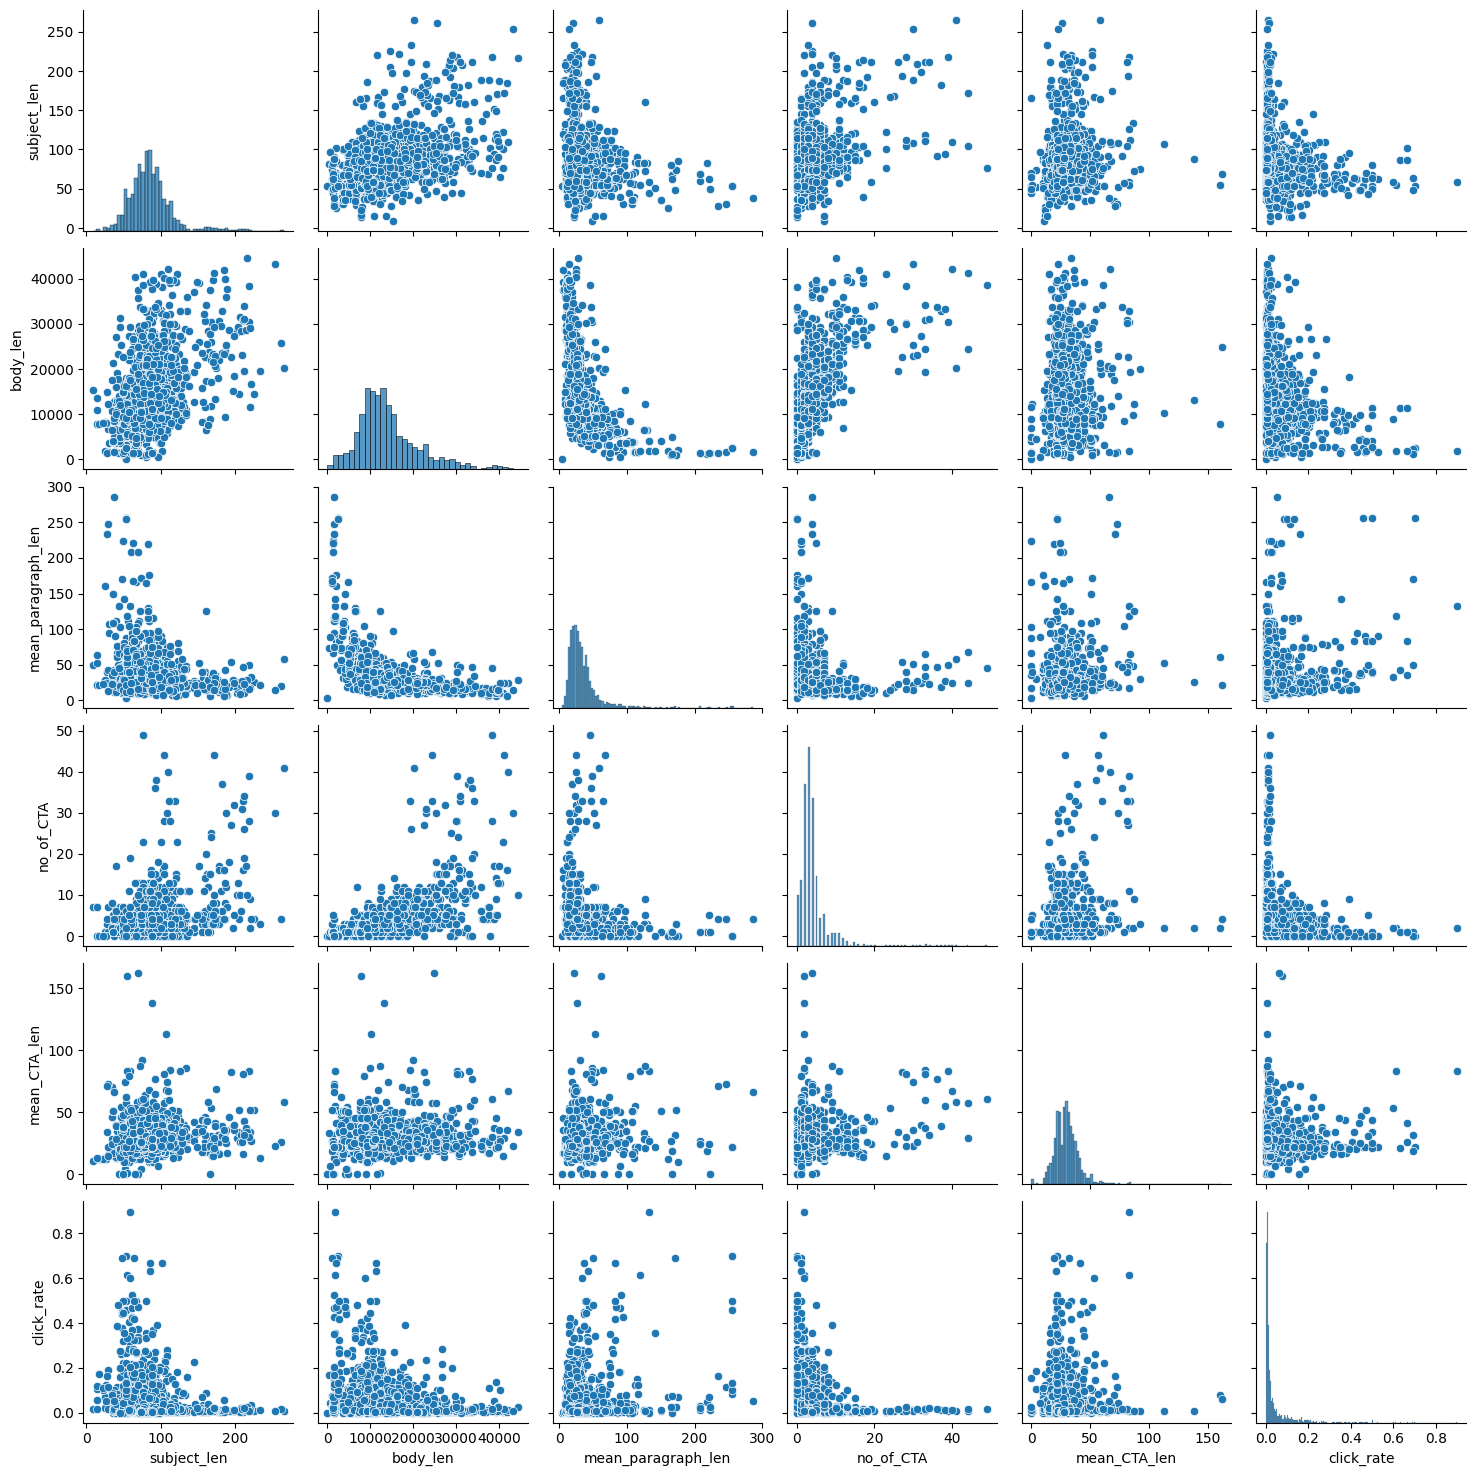

In [31]:

plot_numerical_with_target(data, numerical_cols, 'click_rate', 'images/pairplot.jpg')


#### DATA PREPROCESSING

In [29]:
# Interquartile Range (IQR) method
def detect_outliers_iqr(data, k=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outliers
    
outliers_iqr = detect_outliers_iqr(data["click_rate"])

print("Outliers detected using IQR method:", outliers_iqr)

Outliers detected using IQR method: [   0    1    4    5    6    7   10   11   15   16   20   21   24   81
   88   89   90  110  125  142  150  154  155  167  170  171  175  183
  194  213  221  222  227  239  240  243  245  247  252  254  260  263
  265  269  273  276  277  284  286  295  306  317  341  350  353  356
  373  387  399  436  442  444  445  446  447  448  450  453  464  475
  480  493  499  611  615  646  651  653  657  658  659  682  686  693
  694  699  702  704  709  710  719  721  723  726  731  736  748  749
  762  769  777  779  782  785  787  791  792  803  805  812  831  834
  837  842  845  866  884  912  917  922  938  951  961  974  977  991
  994 1002 1007 1009 1015 1017 1035 1037 1090 1099 1113 1119 1138 1139
 1147 1148 1157 1159 1183 1186 1187 1190 1205 1210 1220 1237 1246 1256
 1257 1262 1271 1276 1277 1278 1284 1285 1310 1313 1315 1318 1326 1333
 1334 1346 1351 1363 1373 1381 1390 1392 1393 1397 1398 1402 1413 1456
 1466 1474 1477 1507 1514 1517 1518 1519 

In [30]:
outlier_indices_list = str(outliers_iqr).strip("[]").split()

In [31]:
outlier_indices = [int(index) for index in outlier_indices_list]

In [32]:
len(outlier_indices)

268

In [33]:
outliers = data.iloc[outlier_indices]

In [34]:
outliers

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,no_of_image,is_personalised,no_of_quotes,is_timer,no_of_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
5,6,3,54,2569,256,4,0,Evening,2,11,...,0,0,0,0,0,0,0,0,10,0.500000
6,7,3,54,2570,256,4,0,Evening,2,11,...,0,0,0,0,0,0,0,0,10,0.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,1876,3,51,1824,142,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.354545
1877,1878,3,54,2565,255,4,0,Evening,2,11,...,1,0,0,0,0,0,0,0,10,0.131313
1878,1879,3,88,1451,75,4,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.201923
1880,1881,3,88,1451,75,4,0,Morning,2,11,...,0,0,1,0,0,0,0,0,10,0.169014


In [35]:
filtered_data = data[~data.index.isin(outlier_indices)]

In [36]:
filtered_data

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,no_of_image,is_personalised,no_of_quotes,is_timer,no_of_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
8,9,3,89,10055,14,4,0,Noon,6,26,...,1,0,0,0,0,0,0,0,13,0.029233
9,10,3,89,11049,26,3,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.003058
12,13,3,82,9587,33,2,0,Evening,15,9,...,1,0,0,0,0,0,0,0,15,0.006463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,1883,3,74,10535,40,3,0,Evening,2,11,...,0,0,0,0,0,0,0,0,15,0.002748
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


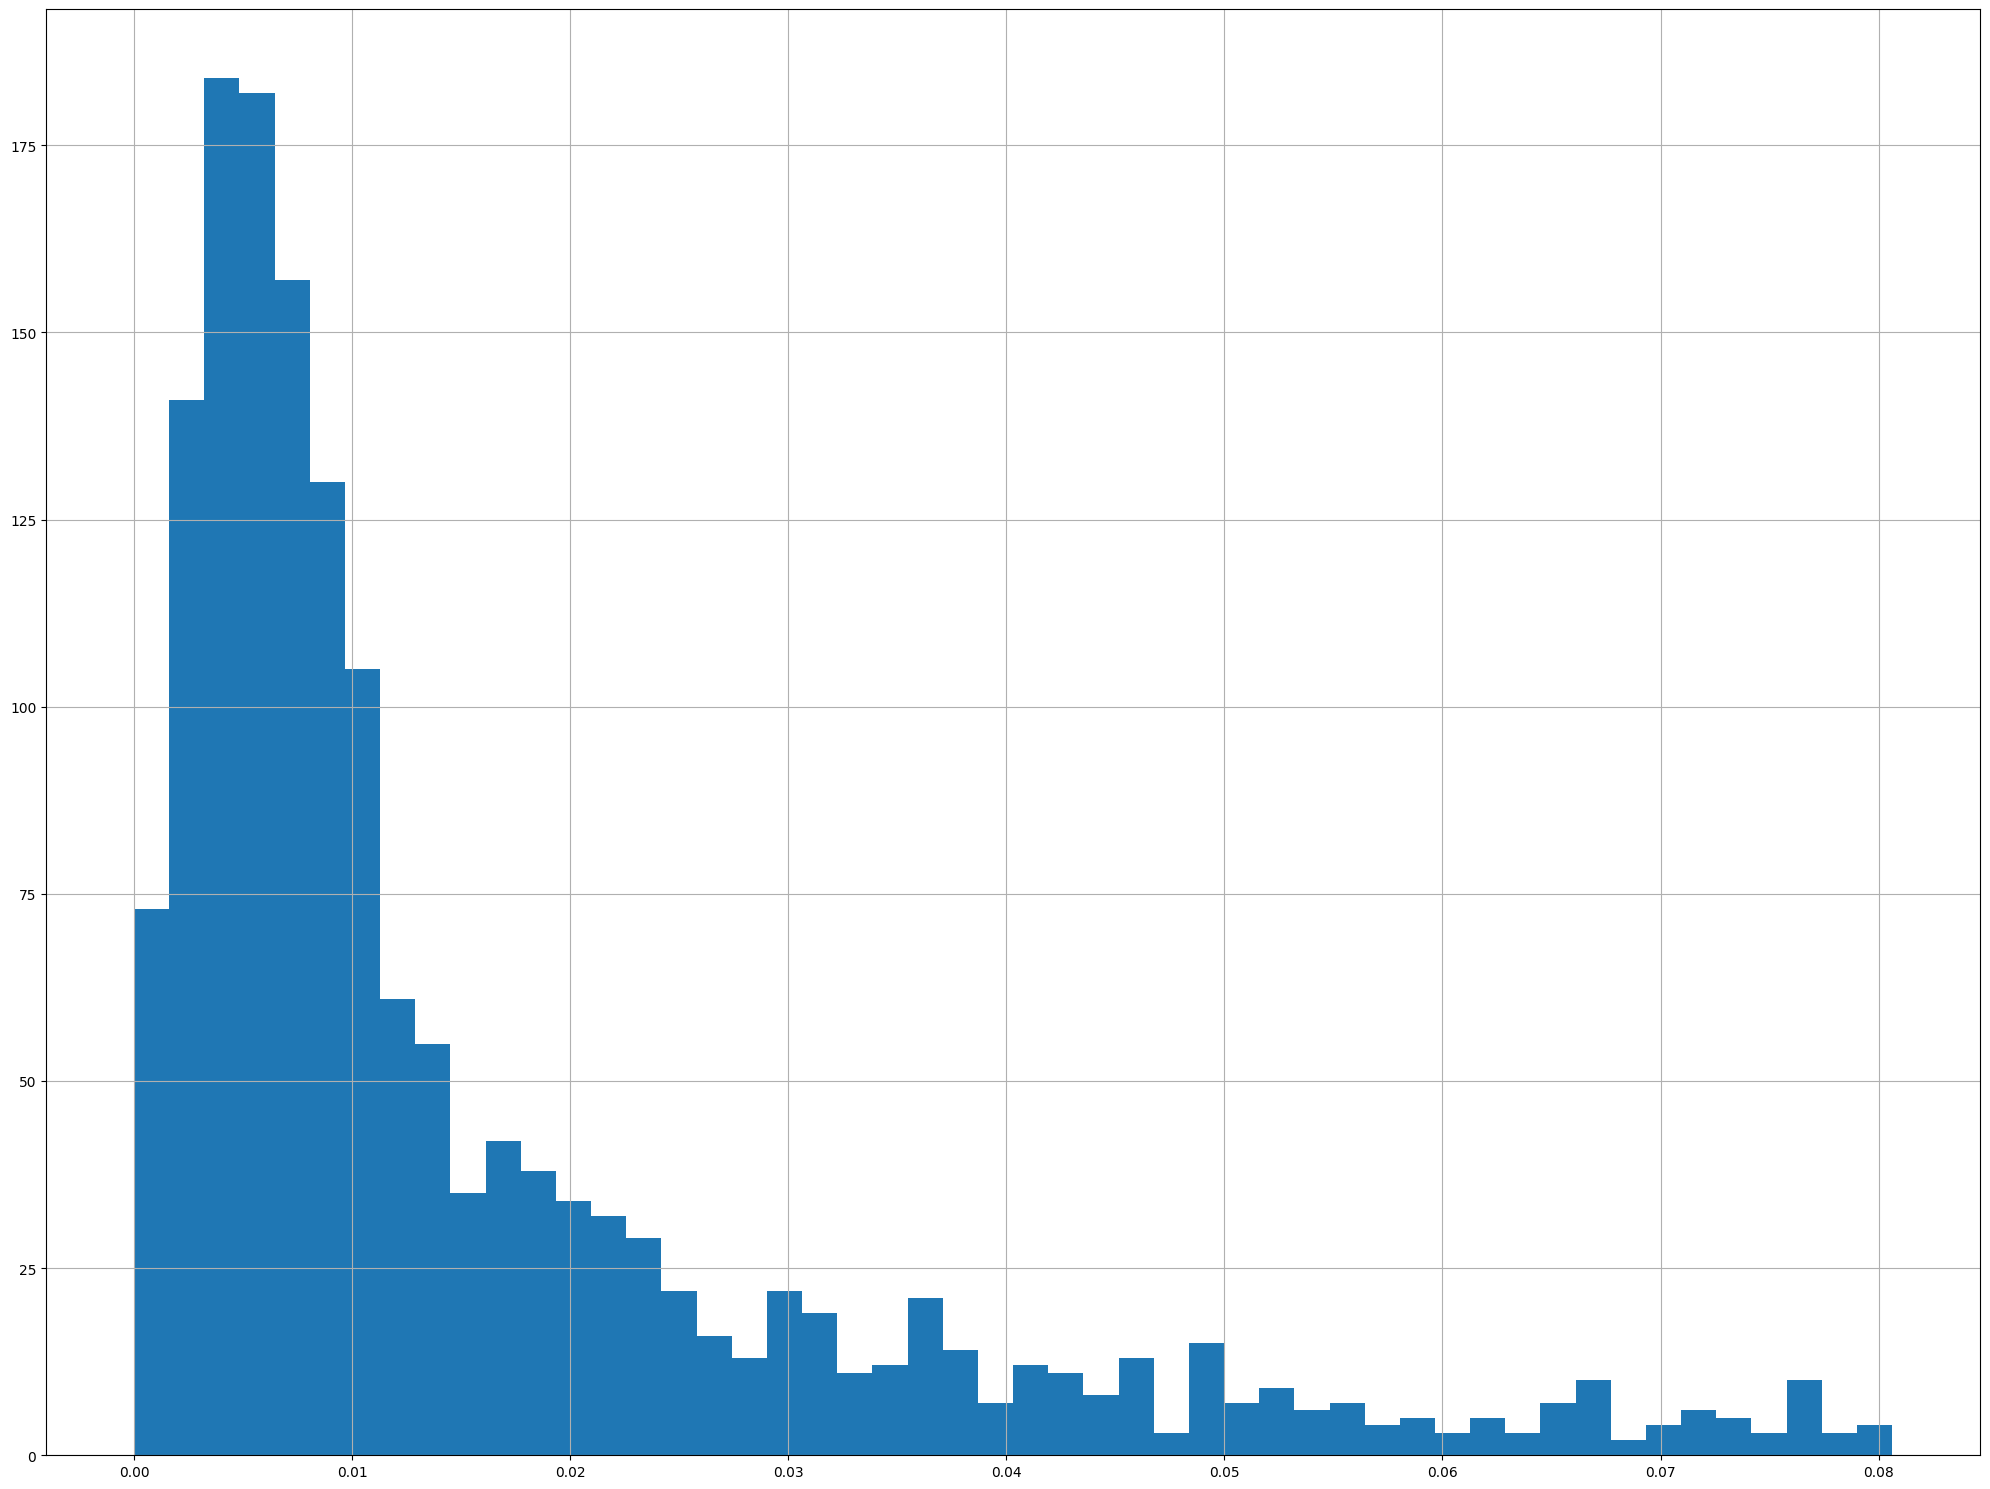

In [37]:
plot_hist(filtered_data.click_rate)

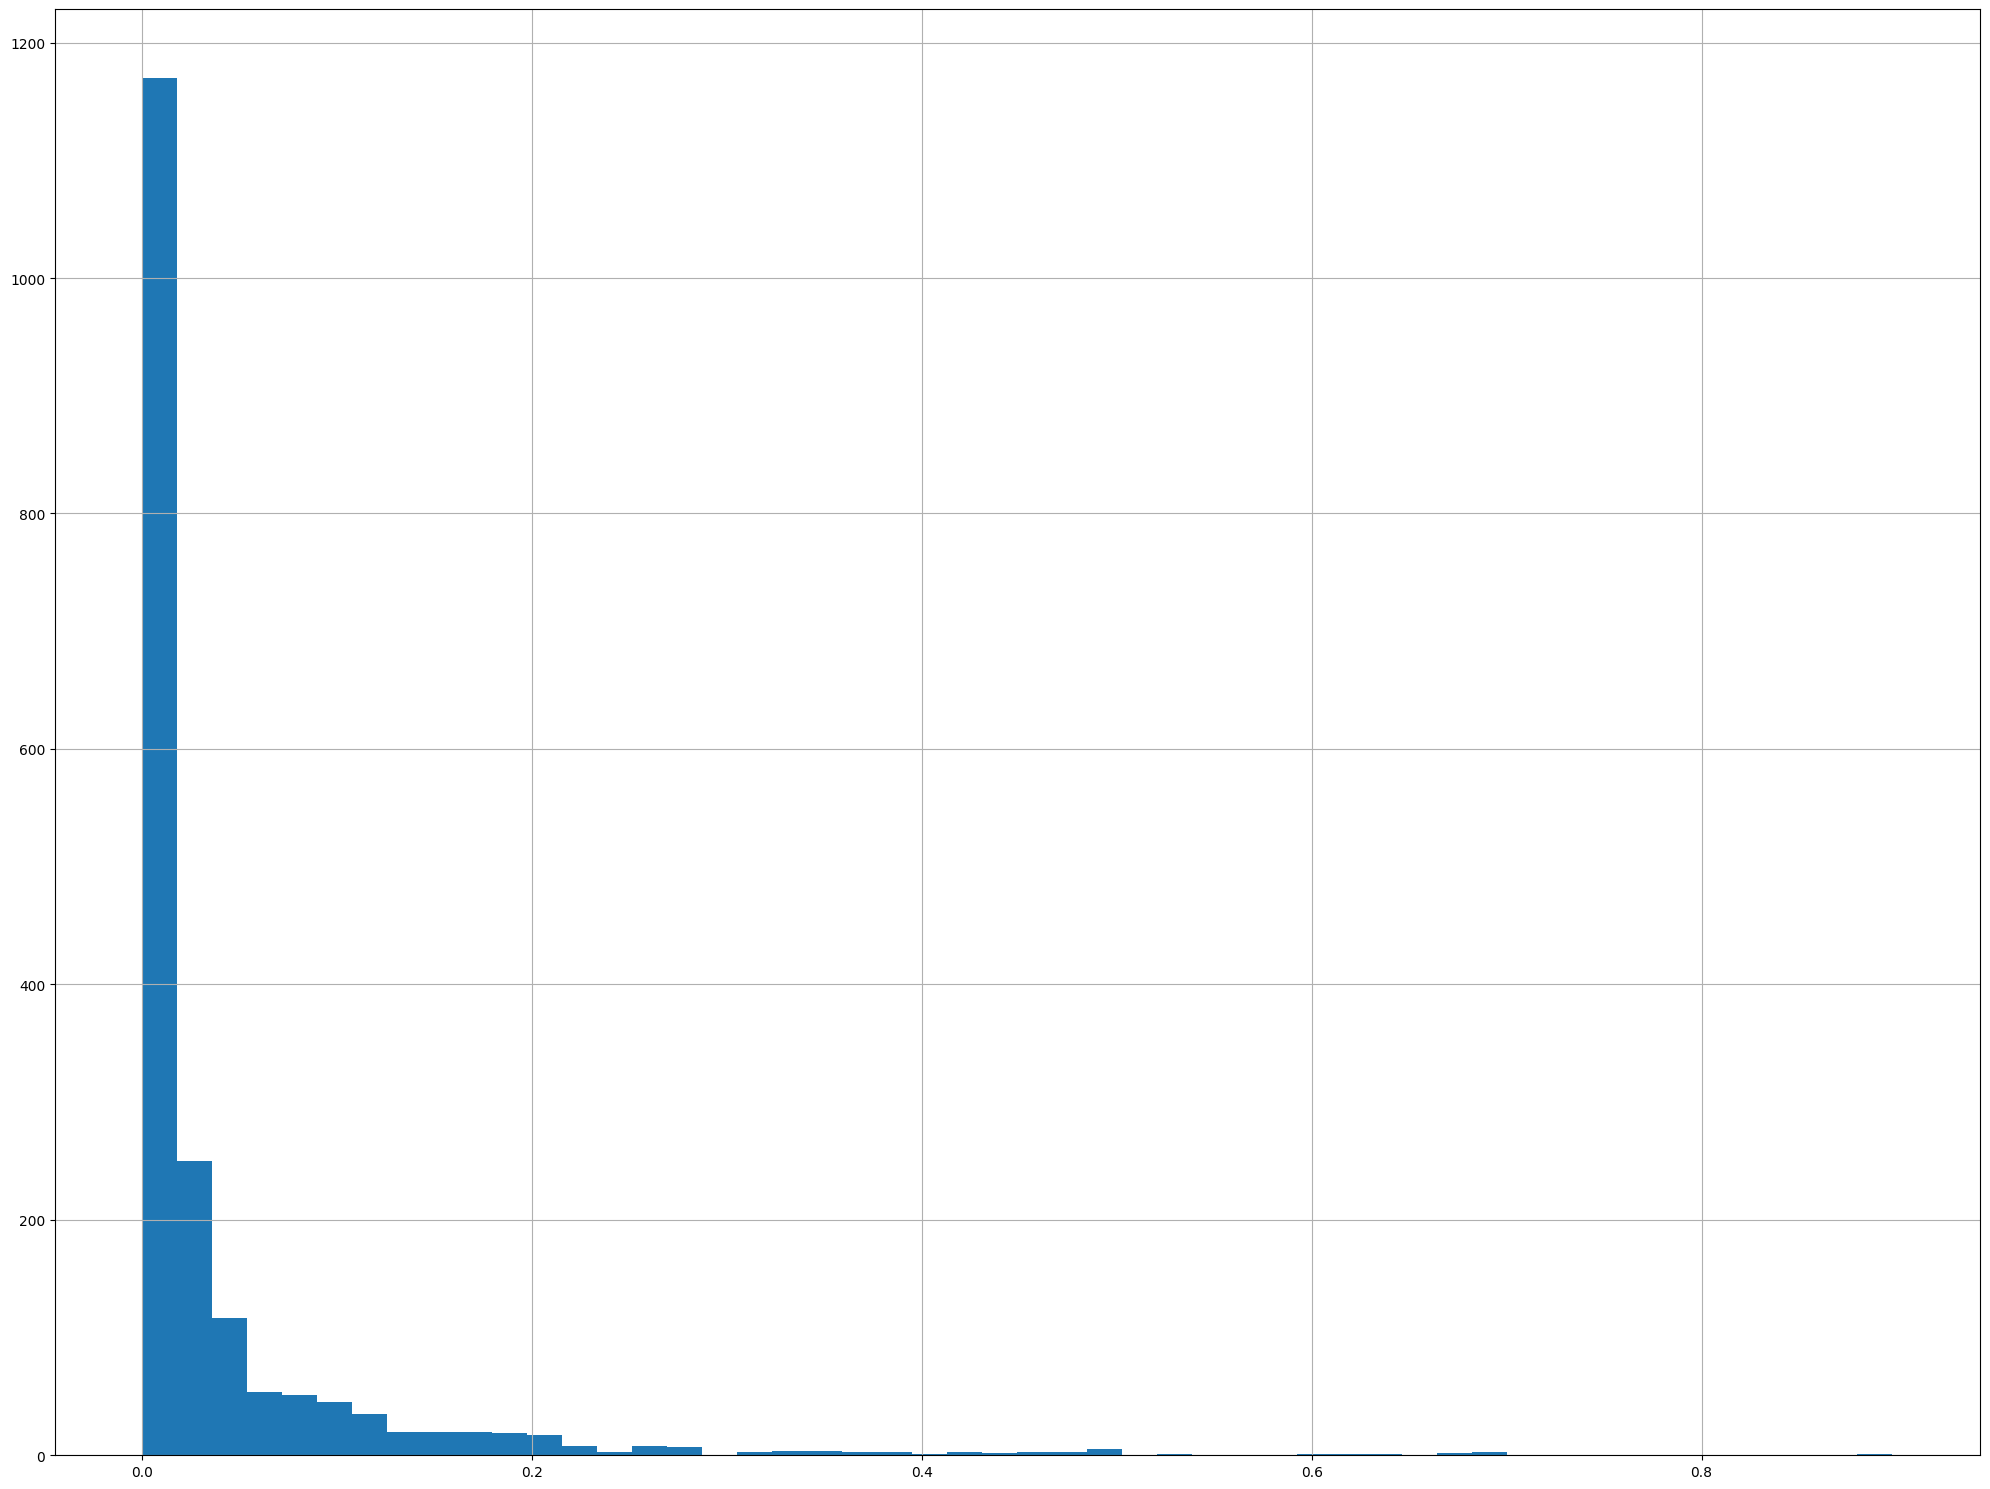

In [38]:
plot_hist(data.click_rate)

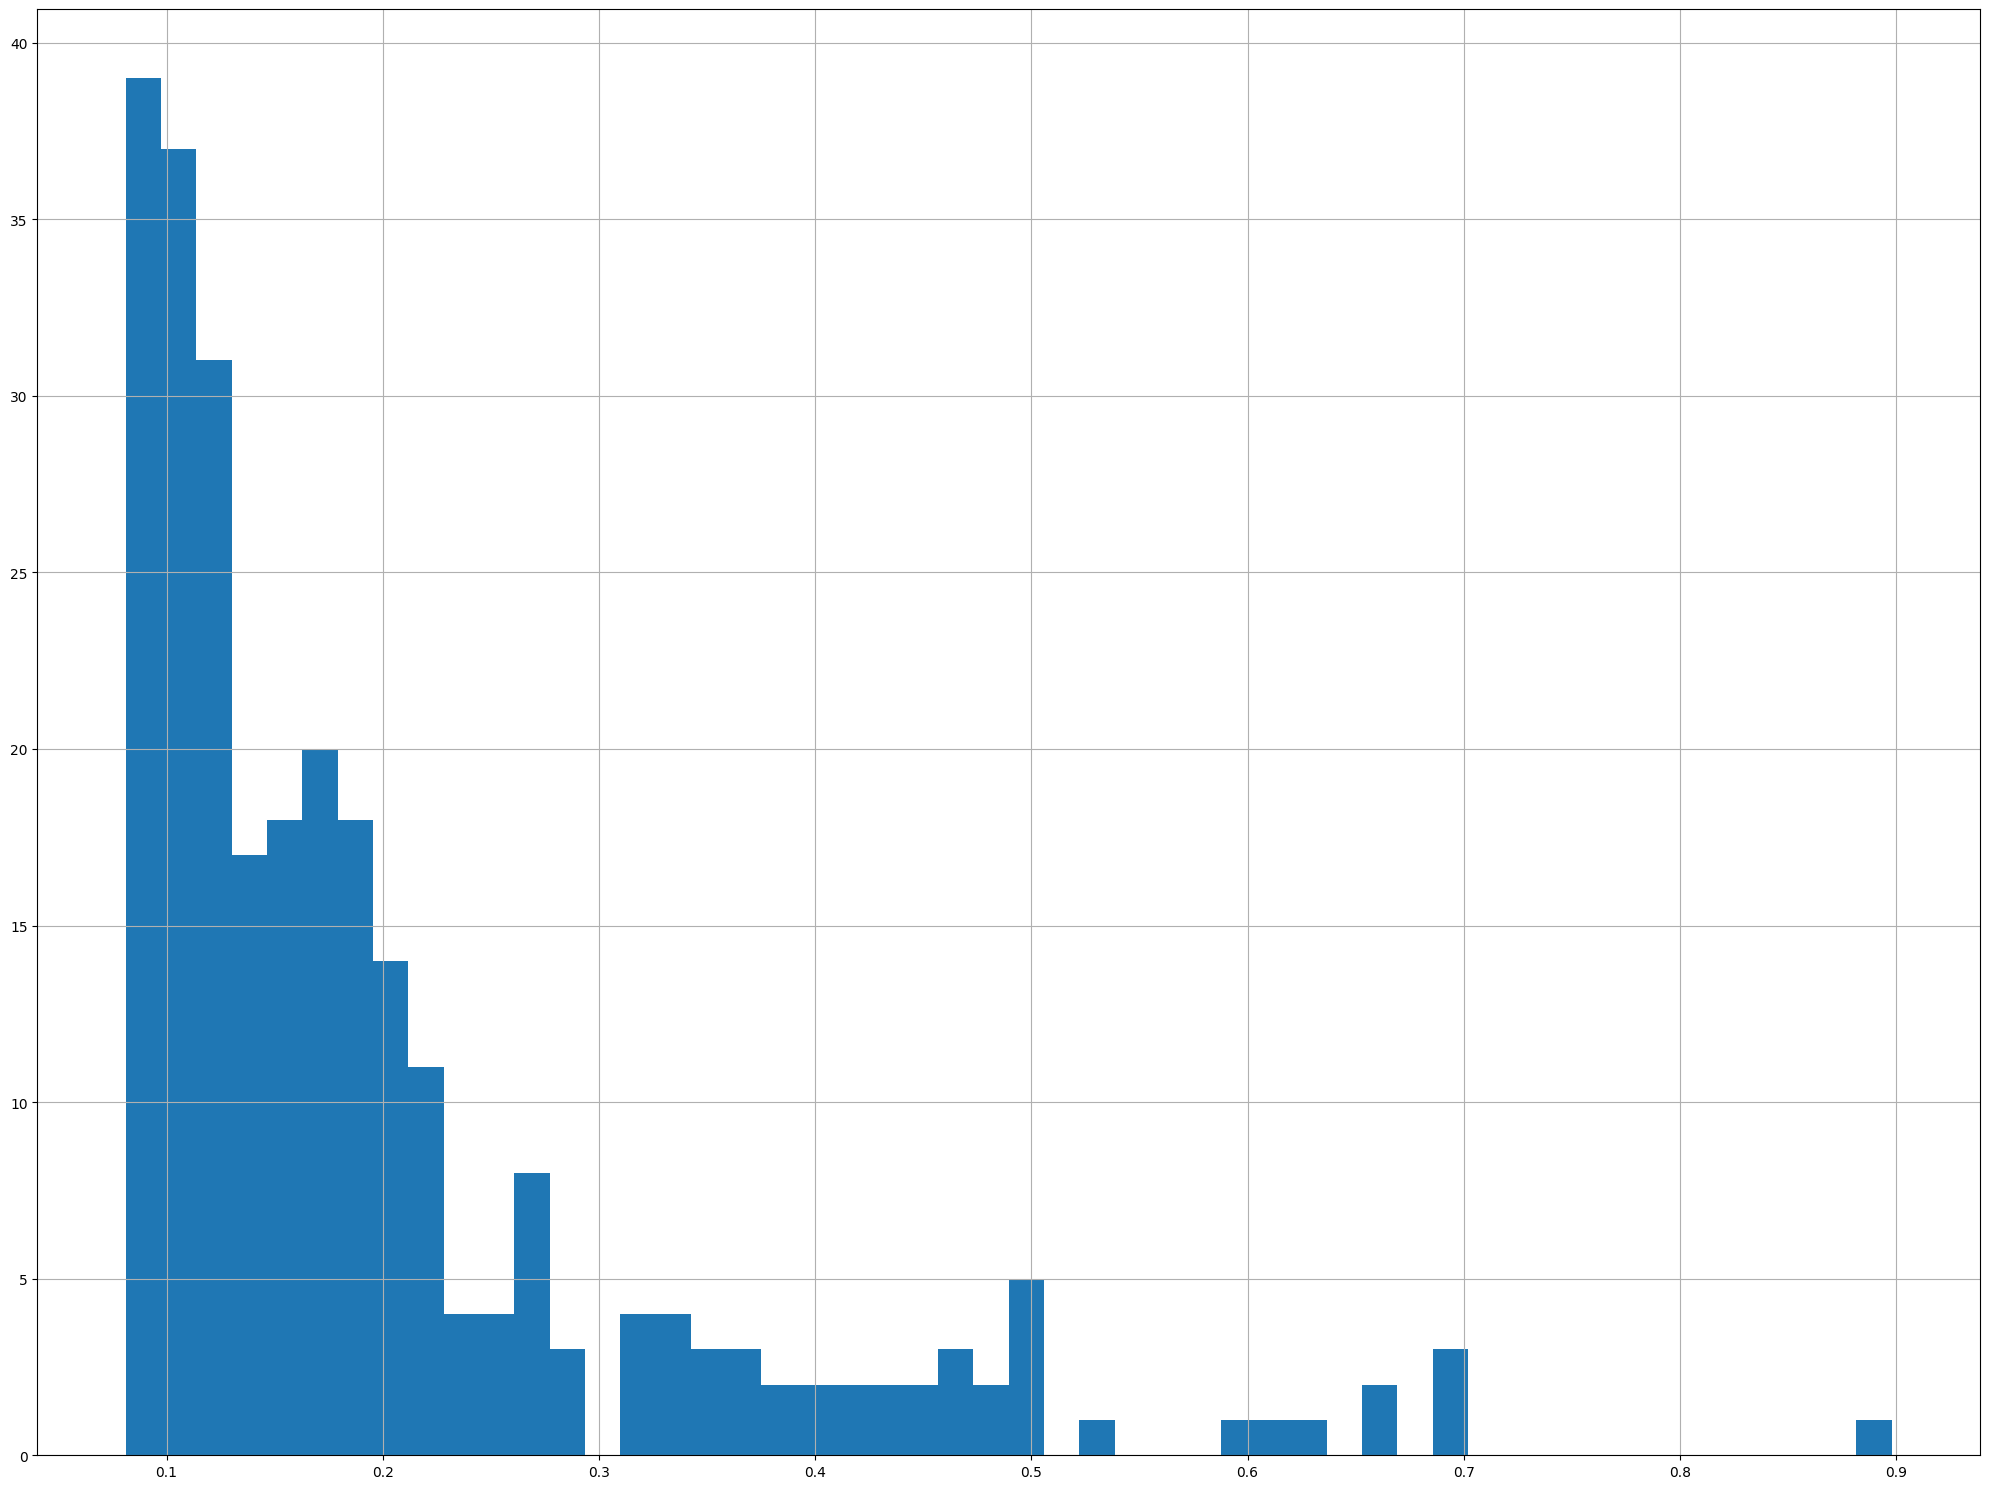

In [39]:
plot_hist(outliers.click_rate)

In [40]:
filtered_data.click_rate.max(), filtered_data.click_rate.min()

(0.080620155, 0.0)

In [41]:
outliers.click_rate.max(), outliers.click_rate.min()

(0.8979591836734694, 0.081081081)

In [42]:
data.click_rate.max(), data.click_rate.min()

(0.8979591836734694, 0.0)

#### PIPELINE FUNCTIONS

In [43]:
from sklearn.base import TransformerMixin, BaseEstimator

In [44]:
class AttributeCombiner(BaseEstimator, TransformerMixin):

    def __init__(self, add_total_visual_content=True, add_paragraph_body_ratio=True):
        self.add_total_visual_content=add_total_visual_content
        self.add_paragraph_body_ratio=add_paragraph_body_ratio


    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            X = X.values
        total_visual_content = X[:, no_of_images_index] + X[:, no_of_quotes_index]
        paragraph_body_ratio = X[:, mean_paragraph_len_index] / X[:, body_len_index]
        if self.add_total_visual_content and not self.add_paragraph_body_ratio:
            return np.c_[X, total_visual_content]
        elif self.add_paragraph_body_ratio and not self.add_total_visual_content:
            return np.c_[X, paragraph_body_ratio]
        elif self.add_paragraph_body_ratio and self.add_total_visual_content:
            return np.c_[X, total_visual_content, paragraph_body_ratio]
        else:
            return X
        

In [45]:
class ColumnStringConverter(BaseEstimator, TransformerMixin):
    def __init__(self, convert=True):
        self.convert=convert
      
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for idx, col in enumerate(X.columns, start=0):

            X[col] = X[col].astype(str)

        return X

### PREPARE DATA FOR ML

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

In [47]:
data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,no_of_image,is_personalised,no_of_quotes,is_timer,no_of_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


### SPLIT THE DATA INTO TRAIN AND TEST SET

In [48]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['click_rate', 'campaign_id', 'is_timer'])
Y = data['click_rate']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1510, 19), (378, 19), (1510,), (378,))

In [49]:
data.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
no_of_image             int64
is_personalised         int64
no_of_quotes            int64
is_timer                int64
no_of_emoticons         int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

#### TRANSFORMATION PIPELINE

In [50]:
no_of_images_index, no_of_quotes_index, mean_paragraph_len_index, body_len_index = 6, 7, 3, 2
numerical_feature=['day_of_week','subject_len', 'body_len', 'mean_paragraph_len','no_of_CTA', 'mean_CTA_len', 'no_of_image',  'no_of_quotes','no_of_emoticons']
categorical_features=['is_discount', 'is_price', 'is_urgency', 'is_personalised',  'is_weekend', 'sender', 'category', 'product', 'target_audience']
one_hot_features=['times_of_day']

numerical_pipeline = Pipeline([
    ('attr_combiner', AttributeCombiner(add_total_visual_content=True, add_paragraph_body_ratio=True)),
    ('standardscaler', StandardScaler())
]
                             )

categorical_pipeline = Pipeline(
    [
        ('str_converter', ColumnStringConverter())

    ]
)


one_hot_pipeline = Pipeline([
    
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


pipeline = ColumnTransformer([
    ("numerical_pipeline", numerical_pipeline, numerical_feature),
    ("categorical_pipeline", categorical_pipeline, categorical_features),
    ('one_hot_pipeline', one_hot_pipeline, one_hot_features)
])

X_train_transformed = pipeline.fit_transform(X_train)
X_train_transformed

# num_tr = one_hot_pipeline.fit_transform(X_train[one_hot_features])
# num_tr

array([[-1.044429100288116, -0.5527969699892784, 1.5727108733267938, ...,
        1.0, 0.0, 0.0],
       [-1.6121353427053424, -1.0424474087776385, 0.2275975389885701,
        ..., 1.0, 0.0, 0.0],
       [0.09098338454633695, 0.19800036948620708, -1.004287020359859,
        ..., 1.0, 0.0, 0.0],
       ...,
       [0.6586896269635634, 0.8182242586181299, -0.10068244746832836,
        ..., 1.0, 0.0, 0.0],
       [0.09098338454633695, -1.0424474087776385, -0.8982915332072503,
        ..., 1.0, 0.0, 0.0],
       [-0.4767228578708895, -0.19371998154448097, -0.07592234679488431,
        ..., 1.0, 0.0, 0.0]], dtype=object)

In [51]:
pipeline

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('attr_combiner',
                                                  AttributeCombiner()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['day_of_week', 'subject_len', 'body_len',
                                  'mean_paragraph_len', 'no_of_CTA',
                                  'mean_CTA_len', 'no_of_image', 'no_of_quotes',
                                  'no_of_emoticons']),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('str_converter',
                                                  ColumnStringConverter())]),
                                 ['is_discount', 'is_price', 'is_urgency',
                                  'is_personalised', 'is_weekend', 'sender',
                                  'category', 'product', 'target_audience']),
                                ('one_hot_pipeline',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['times_of_day'])])

In [52]:
type(X_train_transformed)

numpy.ndarray

In [53]:
X_train_transformed.shape

(1510, 23)

### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, Y_train)

LinearRegression()

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = lin_reg.predict(X_train_transformed)
lin_mse = mean_squared_error(Y_train, Y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.08030917311036544

In [56]:
X_test_transformed = pipeline.transform(X_test)

In [57]:
X_test_transformed.shape

(378, 23)

In [58]:
Y_pred = lin_reg.predict(X_test_transformed)

In [59]:
lin_mse = mean_squared_error(Y_test, Y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.062281659277883074

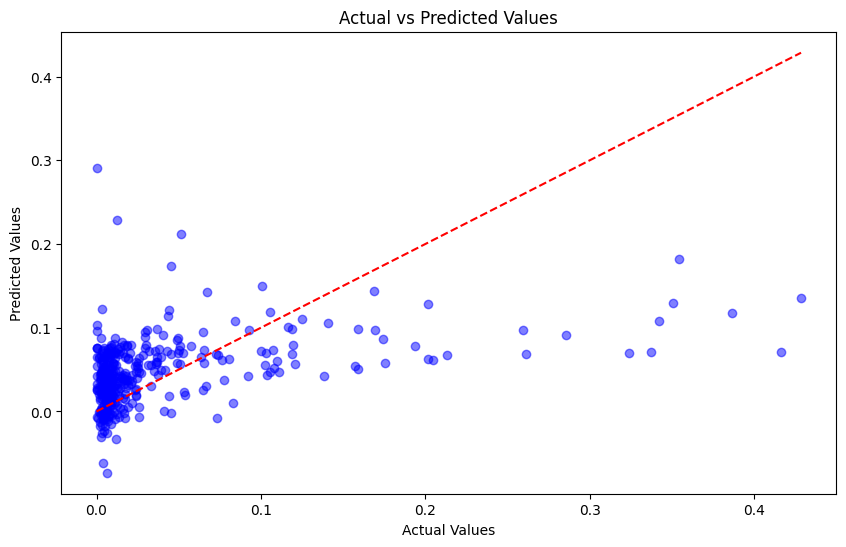

In [60]:
import matplotlib.pyplot as plt

def plot_predictions(Y_test, Y_pred):
    """
    Plot the relationship between actual and predicted values.

    Parameters:
    Y_test (array-like): Array containing the actual values.
    Y_pred (array-like): Array containing the predicted values.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
    plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()
plot_predictions(Y_test, Y_pred)

### Decision tree

In [69]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
cat_encoder = pipeline.named_transformers_["one_hot_pipeline"]
cat_one_hot_attribs = list(cat_encoder.get_feature_names_out(one_hot_features))

# Define additional hyperparameters
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=3, min_samples_split=2)

# Fit the model to your data
tree_reg.fit(X_train_transformed, Y_train)

# Export the decision tree to a Graphviz format
dot_data = export_graphviz(tree_reg, out_file="tree_reg.dot"), 
                           feature_names=numerical_feature + categorical_features+ cat_one_hot_attribs + ["total_visual_content", "paragraph_body_ratio"], 
                           filled=True, rounded=True,  
                           special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

AttributeError: 'NoneType' object has no attribute 'splitlines'

In [70]:
import pydotplus
from IPython.display import Image

def convert_dot_to_image(dot_file_path, image_file_path):
    # Read the DOT file
    with open(dot_file_path, 'r') as dot_file:
        dot_data = dot_file.read()

    # Convert DOT to graph
    graph = pydotplus.graph_from_dot_data(dot_data)

    # Save graph to an image file
    graph.write_png(image_file_path)

# Example usage
dot_file_path = 'tree_reg.dot'  # Path to your DOT file
image_file_path = 'tree_reg.png'  # Desired output image file path
convert_dot_to_image(dot_file_path, image_file_path)

# Display the image
Image(image_file_path)


InvocationException: GraphViz's executables not found

In [59]:
tree_reg = DecisionTreeRegressor(random_state=42)

In [60]:
tree_reg.fit(X_train_transformed, Y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
tree_pred = tree_reg.predict(X_test_transformed)
tree_mse = mean_squared_error(tree_pred, Y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.08016877814293448

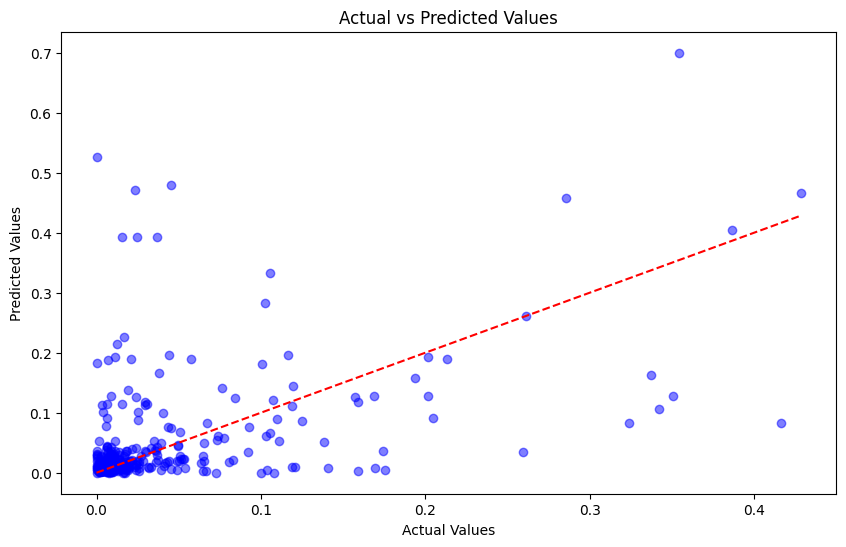

In [62]:
plot_predictions(Y_test, tree_pred)

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42, n_estimators=10)

forest_reg.fit(X_train_transformed, Y_train)
forest_pred = forest_reg.predict(X_test_transformed)

# Calculate RMSE for the test set
forest_test_rmse = np.sqrt(mean_squared_error(Y_test, forest_pred))

# Print the RMSE for the test set
forest_test_rmse

0.05604129177428146

In [64]:
mean_squared_error(Y_test, forest_pred)

0.0031406263837301463

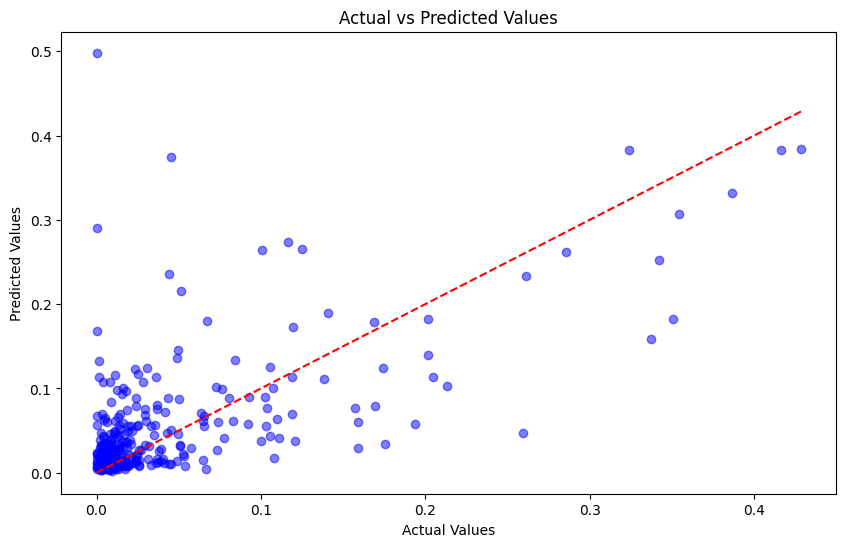

In [65]:
plot_predictions(Y_test, forest_pred)

### XGBoost

In [66]:
import xgboost as xgb

In [67]:
xgb_clf = xgb.XGBRegressor()
xgb_clf.fit(X_train_transformed, Y_train)
xgb_pred = xgb_clf.predict(X_test_transformed)

# Calculate RMSE for the test set
xgb_rmse = np.sqrt(mean_squared_error(Y_test, xgb_pred))

# Print the RMSE for the test set
xgb_rmse

0.052244908156519256

#### PERFORM CROSS VALIDATION

In [68]:
from sklearn.model_selection import cross_val_score, KFold

from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_model(model, X, y, cv=5, scoring="neg_mean_squared_error"):
    """
    Evaluate a model using cross-validation and calculate the scores.

    Parameters:
    model : Estimator object
        The model to evaluate.
    X : array-like or dataframe
        The feature matrix.
    y : array-like
        The target vector.
    cv : int, cross-validation generator or an iterable, optional (default=5)
        Determines the cross-validation splitting strategy.
    scoring : str, callable, list or tuple, optional (default="neg_mean_squared_error")
        Scoring method to use.

    Returns:
    scores : array-like
        The cross-validation scores.
    """
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)

    # Calculate RMSE scores
    rmse_scores = np.sqrt(-scores)

    # Display scores
    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("Standard deviation:", rmse_scores.std())

    return rmse_scores


In [69]:
evaluate_model(tree_reg, X_train_transformed, Y_train, cv=5, scoring="neg_mean_squared_error")

Scores: [0.09742245 0.07740443 0.08603821 0.1048361  0.09238564]
Mean: 0.09161736685051536
Standard deviation: 0.009403816043670162


array([0.09742245, 0.07740443, 0.08603821, 0.1048361 , 0.09238564])

In [70]:
evaluate_model(forest_reg, X_train_transformed, Y_train, cv=5, scoring="neg_mean_squared_error")

Scores: [0.0745819  0.05819128 0.05740383 0.0683635  0.08451109]
Mean: 0.06861032091701114
Standard deviation: 0.010224451343388511


array([0.0745819 , 0.05819128, 0.05740383, 0.0683635 , 0.08451109])

In [71]:
evaluate_model(lin_reg, X_train_transformed, Y_train, cv=5, scoring="neg_mean_squared_error")

Scores: [0.08434341 0.06845057 0.07155197 0.08359407 0.09910729]
Mean: 0.08140946384977618
Standard deviation: 0.010878386190152713


array([0.08434341, 0.06845057, 0.07155197, 0.08359407, 0.09910729])

In [72]:
evaluate_model(xgb_clf, X_train_transformed, Y_train, cv=5, scoring="neg_mean_squared_error")

Scores: [0.0753142  0.05426092 0.05923605 0.07833645 0.07889668]
Mean: 0.0692088576695992
Standard deviation: 0.010366674649373164


array([0.0753142 , 0.05426092, 0.05923605, 0.07833645, 0.07889668])

In [73]:

# joblib.dump(forest_reg, "ForestReg.pkl")
# joblib.dump(lin_reg, "LinearReg.pkl")
# joblib.dump(tree_reg, "TreeReg.pkl")

In [74]:
%%time
from sklearn.model_selection import GridSearchCV
params_grid = [
    {'n_estimators': [3, 10, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': [2, 4, 6, 9, 11, 14]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 40, 50], 'max_features': [2, 3, 6, 10]}
]
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, params_grid, cv=10,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_transformed, Y_train)

CPU times: total: 2min 49s
Wall time: 2min 51s


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 9, 11, 14],
                          'n_estimators': [3, 10, 30, 40, 50, 60, 70, 80, 90,
                                           100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 6, 10],
                          'n_estimators': [3, 10, 40, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [75]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 50}

In [76]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=50,
                      random_state=42)

In [77]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.0792203560677139 {'max_features': 2, 'n_estimators': 3}
0.06840708845651752 {'max_features': 2, 'n_estimators': 10}
0.06407606211764012 {'max_features': 2, 'n_estimators': 30}
0.0640012805515525 {'max_features': 2, 'n_estimators': 40}
0.063468363894174 {'max_features': 2, 'n_estimators': 50}
0.06343147991347887 {'max_features': 2, 'n_estimators': 60}
0.06312039187418396 {'max_features': 2, 'n_estimators': 70}
0.06284635009661439 {'max_features': 2, 'n_estimators': 80}
0.06272119469583429 {'max_features': 2, 'n_estimators': 90}
0.06276375438934588 {'max_features': 2, 'n_estimators': 100}
0.07670397399514257 {'max_features': 4, 'n_estimators': 3}
0.06572513634233018 {'max_features': 4, 'n_estimators': 10}
0.06475811061411614 {'max_features': 4, 'n_estimators': 30}
0.06406707977790617 {'max_features': 4, 'n_estimators': 40}
0.0634644546406136 {'max_features': 4, 'n_estimators': 50}
0.06345919637756459 {'max_features': 4, 'n_estimators': 60}
0.06295926375805963 {'max_features': 4, 'n_est

In [78]:
import pandas as pd

def show_feature_importance(grid_search, numerical_feature, categorical_features, extra_attributes=False):
    feature_importances = grid_search.best_estimator_.feature_importances_

    # Define extra attributes if needed
        extra_attribs = ["total_visual_content", "paragraph_body_ratio"] if extra_attributes else []

    # Extract categorical encoder
    cat_encoder = pipeline.named_transformers_["one_hot_pipeline"]
    cat_one_hot_attribs = list(cat_encoder.get_feature_names_out(one_hot_features))

    # Concatenate features
    attributes = numerical_feature + categorical_features + cat_one_hot_attribs + extra_attribs

    # Combine feature importances with attributes and sort
    feature_importance_list = sorted(zip(feature_importances, attributes), reverse=True)

    # Convert to DataFrame
    feature_importance_df = pd.DataFrame(feature_importance_list, columns=['Importance', 'Feature'])

    # Reorder columns
    feature_importance_df = feature_importance_df[['Feature', 'Importance']]

    return feature_importance_df

# Usage:
# Set extra_attributes=True if you want to include extra attributes
feature_importance_table = show_feature_importance(grid_search, numerical_feature, categorical_features, extra_attributes=True)
feature_importance_table


,Feature,Importance
0,body_len,0.219150
1,is_price,0.122930
2,no_of_CTA,0.106096
3,mean_paragraph_len,0.097777
4,mean_CTA_len,0.076694
5,subject_len,0.071186
6,target_audience,0.050264
7,times_of_day_Evening,0.049352
8,day_of_week,0.039351
9,no_of_image,0.028550


In [79]:
final_forest_model = grid_search.best_estimator_

In [80]:
final_forest_pred = final_forest_model.predict(X_test_transformed)

In [81]:
def print_scores(Y_test, predictions):
    mse = mean_squared_error(Y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, predictions)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R^2 Score:", r2)

In [82]:
final_forest_r2 = print_scores(Y_test, final_forest_pred)

Mean Squared Error: 0.0021315993076424884
Root Mean Squared Error: 0.04616924634042111
R^2 Score: 0.5182776711389061


In [83]:
final_forest_r2

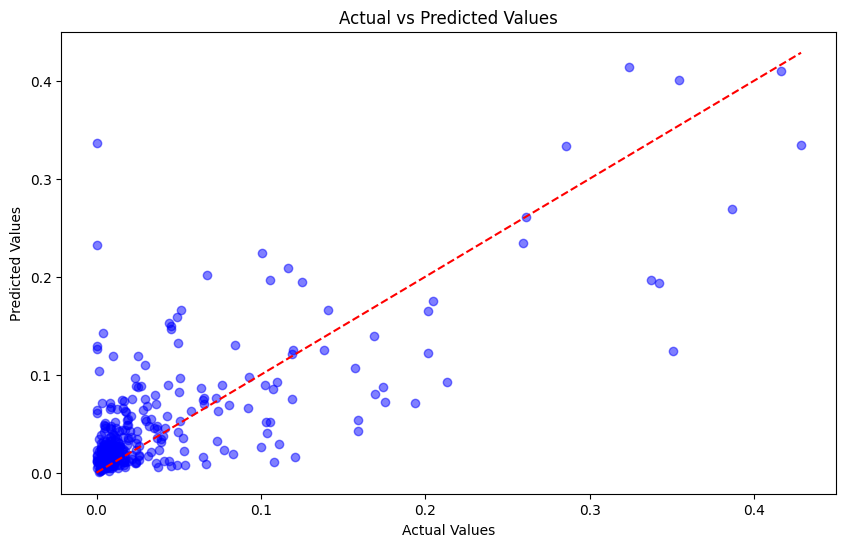

In [84]:
plot_predictions(Y_test, final_forest_pred)

### Y-SCRAMBLING

In [85]:
def perform_y_scrambling(model, X_train_transformed, Y_train, X_test_transformed):
    # Copy Y_train and shuffle it
    shuffled_y = Y_train.reset_index(drop=True).copy().values
    np.random.shuffle(shuffled_y)
    
    # Fit the model with the shuffled Y_train
    model.fit(X_train_transformed, shuffled_y)
    
    # Predict using the shuffled Y_train
    y_scrambled_pred = model.predict(X_test_transformed)
    
    return y_scrambled_pred


### RANDOM FOREST

In [86]:
y_scrambled_predictions = perform_y_scrambling(RandomForestRegressor(), X_train_transformed, Y_train, X_test_transformed)

In [87]:
print_scores(Y_test, y_scrambled_predictions)

Mean Squared Error: 0.006179059497300526
Root Mean Squared Error: 0.07860699394647098
R^2 Score: -0.3964120369803119


In [88]:
print_scores(Y_test, forest_pred)

Mean Squared Error: 0.0031406263837301463
Root Mean Squared Error: 0.05604129177428146
R^2 Score: 0.2902466001800622


#### LINEAR REGRESSION

In [89]:
y_scrambled_predictions = perform_y_scrambling(LinearRegression(), X_train_transformed, Y_train, X_test_transformed)

In [90]:
print_scores(Y_test, y_scrambled_predictions)

Mean Squared Error: 0.004580155015893931
Root Mean Squared Error: 0.0676768425378573
R^2 Score: -0.03507396202030311


In [91]:
print_scores(Y_test, Y_pred)

Mean Squared Error: 0.0038790050824063184
Root Mean Squared Error: 0.062281659277883074
R^2 Score: 0.12337963553411269


### XGBOOST

In [92]:
y_scrambled_predictions = perform_y_scrambling(xgb.XGBRegressor(), X_train_transformed, Y_train, X_test_transformed)

In [93]:
print_scores(Y_test, y_scrambled_predictions)

Mean Squared Error: 0.0075380425392491835
Root Mean Squared Error: 0.08682190126488352
R^2 Score: -0.703530018067609


In [94]:
print_scores(Y_test, xgb_pred)

Mean Squared Error: 0.002729530428283132
Root Mean Squared Error: 0.052244908156519256
R^2 Score: 0.38315059969502463


### DECISION TREE 

In [95]:
y_scrambled_predictions = perform_y_scrambling(DecisionTreeRegressor(), X_train_transformed, Y_train, X_test_transformed)

In [96]:
print_scores(Y_test, y_scrambled_predictions)

Mean Squared Error: 0.0137523229969804
Root Mean Squared Error: 0.11727029886966435
R^2 Score: -2.107901676268741


In [97]:
print_scores(Y_test, tree_pred)

Mean Squared Error: 0.006291729659583948
Root Mean Squared Error: 0.07932042397506425
R^2 Score: -0.4218744833105068


### FINE TUNE XGBOOST

In [100]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
params_dist = {
    'n_estimators': randint(3, 101),             # Random integer between 3 and 100
    'max_depth': randint(2, 11),                  # Random integer between 2 and 10
    'learning_rate': [0.05, 0.1, 0.15, 0.2],      # Specific values to try
    'min_child_weight': randint(1, 8),            # Random integer between 1 and 7
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],            # Specific values to try
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],       # Specific values to try
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],# Specific values to try
    'reg_alpha': [0, 0.1, 0.5, 1, 5, 10],         # Specific values to try
    'reg_lambda': [0, 0.1, 0.5, 1, 5, 10],        # Specific values to try
    'scale_pos_weight': [1, 2, 3, 4]              # Specific values to try
}

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_reg, params_dist, n_iter=100, cv=5,
                                   scoring='neg_mean_squared_error', 
                                   return_train_score=True, random_state=42)
random_search.fit(X_train_transformed, Y_train)

# Print best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Negative MSE:", random_search.best_score_)

# Optionally, you can access other attributes such as cv_results_, refit_time_, etc.
# For example, print CV results
print("\nCV Results:")
import pandas as pd
cv_results = pd.DataFrame(random_search.cv_results_)
print(cv_results)


Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 46, 'reg_alpha': 0, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.9}
Best Negative MSE: -0.004257513377831056

CV Results:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.014720      0.001304         0.002660        0.000291   
1        0.011619      0.000489         0.001702        0.000603   
2        0.017226      0.001758         0.002308        0.001177   
3        0.015623      0.000667         0.002007        0.000556   
4        0.009522      0.000643         0.002207        0.000756   
..            ...           ...              ...             ...   
95       0.009027      0.000902         0.003020        0.000719   
96       0.014570      0.001146         0.002207        0.000515   
97       0.022582      0.002061         0.002688        0.000747   
98       0.011136      0.000599         0.002600       

In [101]:
final_xgb_model = random_search.best_estimator_

In [102]:
final_xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=46, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [103]:
final_xgb_pred = final_xgb_model.predict(X_test_transformed)

In [104]:
print_scores(Y_test, final_xgb_pred)

Mean Squared Error: 0.0029995524904008006
Root Mean Squared Error: 0.054768170413122264
R^2 Score: 0.322128035022183


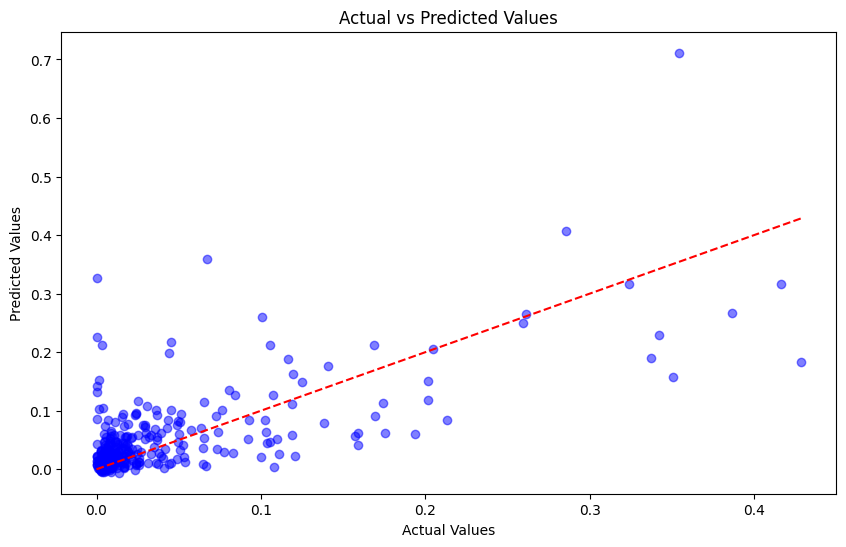

In [105]:
plot_predictions(Y_test, final_xgb_pred)

In [106]:
show_feature_importance(random_search, numerical_feature, categorical_features, extra_attributes=True)

,Feature,Importance
0,sender,0.154506
1,paragraph_body_ratio,0.096135
2,no_of_CTA,0.090147
3,is_price,0.063209
4,body_len,0.052457
5,times_of_day_Noon,0.050056
6,total_visual_content,0.046885
7,target_audience,0.044630
8,mean_paragraph_len,0.043937
9,times_of_day_Morning,0.042714


In [107]:
# Define the tuned hyperparameters
best_n_estimators = 100
best_max_features = 6
best_bootstrap = True  # Assuming you tuned this hyperparameter as well

# Define the final pipeline including preprocessing and model with tuned hyperparameters
final_pipeline = Pipeline([
    ('preprocessing', pipeline),
    ('model', grid_search.best_estimator_)
])

# Train the model
final_pipeline.fit(X_train, Y_train)

# Make predictions
predictions = final_pipeline.predict(X_test)


In [ ]:
import joblib

# Save the final_pipeline model
joblib.dump(final_pipeline, 'final_pipeline_model.joblib')

In [108]:
X_test.shape

(378, 19)

In [109]:
df = pd.read_csv('test_data.csv')

In [110]:
df.shape

(762, 19)

In [111]:
final_pipeline


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('attr_combiner',
                                                                   AttributeCombiner()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['day_of_week', 'subject_len',
                                                   'body_len',
                                                   'mean_paragraph_len',
                                                   'no_of_CTA', 'mean_CTA_len',
                                                   'no_of_image',
                                                   'no_of_quotes',
                                                   'no_of_emoticons']),
                                                 ('categorical_pipeline',
                                                  Pipeline(s...
                                                                   ColumnStringConverter())]),
                                                  ['is_discount', 'is_price',
                                                   'is_urgency',
                                                   'is_personalised',
                                                   'is_weekend', 'sender',
                                                   'category', 'product',
                                                   'target_audience']),
                                                 ('one_hot_pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['times_of_day'])])),
                ('model',
                 RandomForestRegressor(bootstrap=False, max_features=6,
                                       n_estimators=50, random_state=42))])

In [112]:
preprocessing_pipeline = final_pipeline.named_steps['preprocessing']

In [113]:
X_trn = preprocessing_pipeline.transform(X_test)

In [114]:
X_trn.shape

(378, 23)

In [152]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

def calculate_scores(model_names, predictions_list, Y_test):
    scores = []
    
    for model_name, predictions in zip(model_names, predictions_list):
        mse = mean_squared_error(Y_test, predictions)
        rmse = mse ** 0.5
        r2 = r2_score(Y_test, predictions)
        
        scores.append({
            'Model': model_name,
            'Mean Squared Error': mse,
            'Root Mean Squared Error': rmse,
            'R^2 Score': r2
        })
    
    return pd.DataFrame(scores)

# Example usage:
model_names = ['Random Forest', 'Decision Tree', 'XGBoost', 'Linear Regression']
predictions_list = [final_forest_pred, tree_pred, final_xgb_pred, Y_pred]  # Replace with your actual predictions


scores_df = calculate_scores(model_names, predictions_list, Y_test)
print(scores_df)


               Model  Mean Squared Error  Root Mean Squared Error  R^2 Score
0      Random Forest            0.002132                 0.046169   0.518278
1      Decision Tree            0.006292                 0.079320  -0.421874
2            XGBoost            0.003000                 0.054768   0.322128
3  Linear Regression            0.003879                 0.062282   0.123380


In [153]:
def calculate_Y_scores(model_names, predictions_list, Y_test):
    scores = []
    
    for model_name, predictions in zip(model_names, predictions_list):
        mse = mean_squared_error(Y_test, predictions)
        rmse = mse ** 0.5
        r2 = r2_score(Y_test, predictions)
        
        scores.append({
            'Model': model_name,
            'Y_scram_Mean Squared Error': mse,
            'Y_scram_Root Mean Squared Error': rmse,
            'Y_scram_R^2 Score': r2
        })
    
    return pd.DataFrame(scores)

In [154]:
predictions_lists = [perform_y_scrambling(RandomForestRegressor(), X_train_transformed, Y_train, X_test_transformed), 
                    perform_y_scrambling(DecisionTreeRegressor(), X_train_transformed, Y_train, X_test_transformed),
                    perform_y_scrambling(xgb.XGBRegressor(), X_train_transformed, Y_train, X_test_transformed),
                    perform_y_scrambling(LinearRegression(), X_train_transformed, Y_train, X_test_transformed)]  # Replace with your actual predictions


scores_df_cram = calculate_Y_scores(model_names, predictions_lists, Y_test)

In [155]:
scores_df_cram

,Model,Y_scram_Mean Squared Error,Y_scram_Root Mean Squared Error,Y_scram_R^2 Score
0,Random Forest,0.006667,0.081651,-0.506659
1,Decision Tree,0.011256,0.106093,-1.543716
2,XGBoost,0.008350,0.091380,-0.887096
3,Linear Regression,0.004566,0.067572,-0.031880


In [156]:
final_scores = scores_df.join(scores_df_cram.set_index('Model'), on='Model', how='left')

In [151]:
scores_df.columns

Index(['Model', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 Score'], dtype='object')

In [159]:
final_scores = final_scores[column_order]

In [160]:
final_scores

,Model,Mean Squared Error,Y_scram_Mean Squared Error,Root Mean Squared Error,Y_scram_Root Mean Squared Error,R^2 Score,Y_scram_R^2 Score
0,Random Forest,0.002132,0.006667,0.046169,0.081651,0.518278,-0.506659
1,Decision Tree,0.006292,0.011256,0.079320,0.106093,-0.421874,-1.543716
2,XGBoost,0.003000,0.008350,0.054768,0.091380,0.322128,-0.887096
3,Linear Regression,0.003879,0.004566,0.062282,0.067572,0.123380,-0.031880


In [163]:
!pip install openpyxl

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.0 kB 330.3 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.0 kB 409.6 kB/s eta 0:00:01
   --------------- ---------------------- 102.4/250.0 kB 535.8 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/250.0 kB 568.9 kB/s eta 0:00:01
   ---------------------------------- --- 225.3/250.0 kB 765.3 kB/s eta 0:00:01
   -------------------------------------- 250.0/250.0 kB 730.9 kB/s eta 0:00:00


In [164]:
final_scores.to_excel("Prediction Scores.xlsx", index=False)

In [140]:
# Rearrange the columns
column_order = ['Model', 
                'Mean Squared Error', 'Y_scram_Mean Squared Error', 
                'Root Mean Squared Error', 'Y_scram_Root Mean Squared Error', 
                'R^2 Score', 'Y_scram_R^2 Score']
scores_df = scores_df.reindex(columns=column_order)

# Print the rearranged DataFrame
scores_df


,Model,Mean Squared Error,Y_scram_Mean Squared Error,Root Mean Squared Error,Y_scram_Root Mean Squared Error,R^2 Score,Y_scram_R^2 Score
0,Random Forest,0.002132,NaN,0.046169,NaN,0.518278,NaN
1,Decision Tree,0.006292,NaN,0.079320,NaN,-0.421874,NaN
2,XGBoost,0.003000,NaN,0.054768,NaN,0.322128,NaN
3,Linear Regression,0.003879,NaN,0.062282,NaN,0.123380,NaN
